In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [154]:
!pip install pyforest

In [155]:
from pyforest import *
lazy_imports()

['from sklearn.linear_model import LinearRegression',
 'import fbprophet',
 'import altair as alt',
 'from sklearn.preprocessing import MinMaxScaler',
 'from sklearn.decomposition import PCA',
 'import statsmodels.api as sm',
 'from sklearn.preprocessing import LabelEncoder',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'from pathlib import Path',
 'import bokeh',
 'from sklearn.model_selection import StratifiedKFold',
 'import re',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import os',
 'from sklearn.preprocessing import RobustScaler',
 'import plotly as py',
 'from sklearn.linear_model import Lasso',
 'import nltk',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.preprocessing import PolynomialFeatures',
 'from openpyxl import load_workbook',
 'from sklearn.model_selection import RandomizedSearchCV',
 'import spacy',
 'from sklearn.ensemble import RandomForestClassifier',
 'from statsmodels.tsa.arima_model import ARIMA',
 

# 1. Modelling for UCS

In [156]:
df=pd.read_excel("data/python modelling.xlsx",sheet_name="UCSd")

<IPython.core.display.Javascript object>

In [157]:
df

,UCSd (Y),X1-MOLARITY,X3- % FLY ASH,X4- % GGBS
0,4.870,1,80,20
1,5.474,1,80,20
2,6.840,1,80,20
3,6.020,1,80,20
4,7.020,2,80,20
...,...,...,...,...
59,13.840,3,50,50
60,13.250,4,50,50
61,16.120,4,50,50
62,15.040,4,50,50


Y is the target, X_i denote features

In [158]:
y=np.array(df["UCSd (Y)"])

<IPython.core.display.Javascript object>

In [159]:
y

array([ 4.87    ,  5.474   ,  6.84    ,  6.02    ,  7.02    ,  8.24    ,
        8.87    ,  7.57    , 10.44    ,  9.87    , 11.02    ,  9.45    ,
       13.7145  , 11.87    , 12.5     , 13.284   ,  8.06922 ,  9.53715 ,
        7.34    , 10.34    , 12.87    , 10.55    , 13.66057 , 11.33616 ,
       15.34    , 16.75    , 13.24    , 14.12726 , 17.24    , 19.675925,
       18.32    , 16.06492 , 10.24    ,  6.87    ,  9.2     ,  7.9239  ,
       12.87    , 11.89683 ,  9.42    , 10.54    , 11.45    , 15.24    ,
       12.54    , 13.74    , 17.89515 , 16.87    , 15.84    , 14.83209 ,
        7.06401 ,  4.55    ,  7.88    ,  5.767488,  7.87    ,  9.02196 ,
        9.98184 , 11.04    , 10.24    , 11.7568  , 12.76    , 13.84    ,
       13.25    , 16.12    , 15.04    , 14.15    ])

In [160]:
df.head()

,UCSd (Y),X1-MOLARITY,X3- % FLY ASH,X4- % GGBS
0,4.870,1,80,20
1,5.474,1,80,20
2,6.840,1,80,20
3,6.020,1,80,20
4,7.020,2,80,20


In [161]:
df = df.rename(columns={'X1-MOLARITY':'MOLARITY',
                        'X3- % FLY ASH':'FLY ASH',
                        'X4- % GGBS':'GGBS',
                        'UCSd (Y)':'UCSD'
})

In [162]:
df.head()

,UCSD,MOLARITY,FLY ASH,GGBS
0,4.870,1,80,20
1,5.474,1,80,20
2,6.840,1,80,20
3,6.020,1,80,20
4,7.020,2,80,20


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UCSD      64 non-null     float64
 1   MOLARITY  64 non-null     int64  
 2   FLY ASH   64 non-null     int64  
 3   GGBS      64 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 2.1 KB


In [164]:
df.shape

(64, 4)

In [165]:
df.isnull().sum()

UCSD        0
MOLARITY    0
FLY ASH     0
GGBS        0
dtype: int64

no null entries

In [166]:
df.describe()

,UCSD,MOLARITY,FLY ASH,GGBS
count,64.000000,64.000000,64.000000,64.000000
mean,11.393965,2.500000,65.000000,35.000000
std,3.606718,1.126872,11.268723,11.268723
min,4.550000,1.000000,50.000000,20.000000
25%,8.712500,1.750000,57.500000,27.500000
50%,11.188080,2.500000,65.000000,35.000000
75%,13.765000,3.250000,72.500000,42.500000
max,19.675925,4.000000,80.000000,50.000000


## Exploratory Data Analysis 

## Molarity

In [167]:
#Quartiles to check for outliers
from scipy import stats

Q1=df['MOLARITY'].quantile(q=0.25)
Q3=df['MOLARITY'].quantile(q=0.75)

print('1st Quartile (Q1) is: ',Q1)
print('3rd Quartile (Q3) is: ',Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['MOLARITY']))

1st Quartile (Q1) is:  1.75
3rd Quartile (Q3) is:  3.25
Interquartile range (IQR) is  1.5


<IPython.core.display.Javascript object>

{'whiskers': [<matplotlib.lines.Line2D at 0x115cf3e2440>,
 'caps': [<matplotlib.lines.Line2D at 0x115cf3e2980>,
 'boxes': [<matplotlib.lines.Line2D at 0x115cf3e2170>],
 'medians': [<matplotlib.lines.Line2D at 0x115cf3e2ec0>],
 'fliers': [<matplotlib.lines.Line2D at 0x115cf3e3160>],
 'means': []}

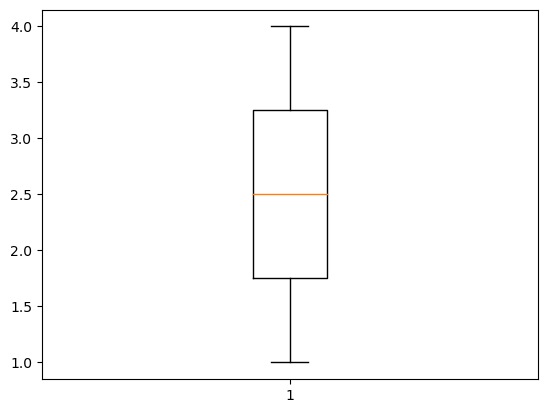

In [168]:
plt.boxplot(df["MOLARITY"])

In [169]:
#Outlier detection from Interquartile range (IQR) in original data


L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outlier limit in cement: ',L_outliers)
print('Upper outlier limit in cement: ',U_outliers)

Lower outlier limit in cement:  -0.5
Upper outlier limit in cement:  5.5


In [170]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in Molarity upper: ', df[df['MOLARITY']>6.0]['MOLARITY'].count())
print('Number of outliers in Molarity lower: ', df[df['MOLARITY']<-2.0]['MOLARITY'].count())

# print('% of Outlier in cement upper: ', round(df[df['cement']>586.4375]['cement'].count()*100/len(df)))
# print('% of Outlier in cement lower: ', round(df[df['cement']<-44.0625]['cement'].count()*100/len(df)))

Number of outliers in Molarity upper:  0
Number of outliers in Molarity lower:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\manav\AppData\Local\Temp\ipykernel_1852\1542525641.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MOLARITY']).set_title('MOLARITY')


<IPython.core.display.Javascript object>

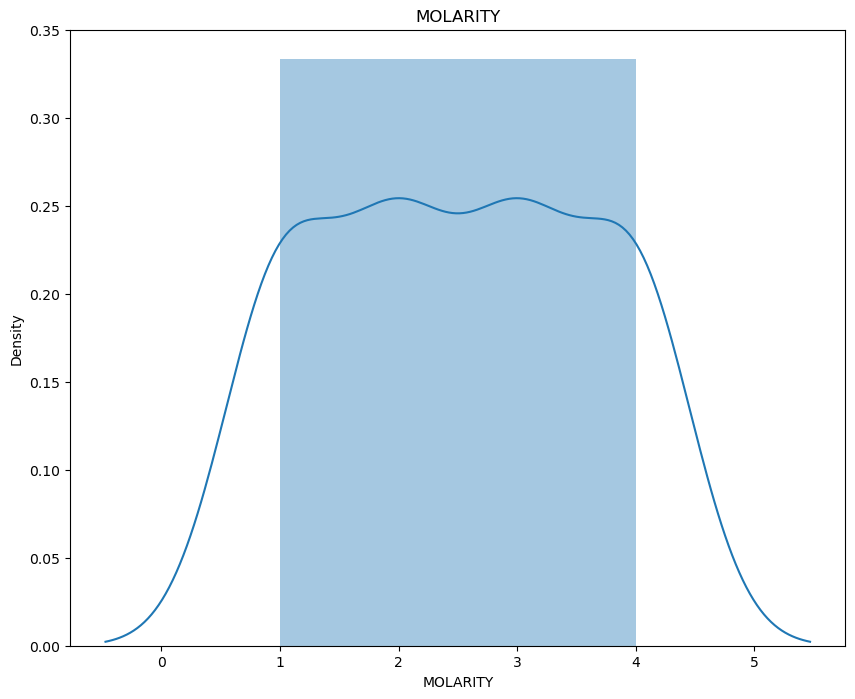

In [171]:
#displot

plt.figure(figsize=(10,8))
sns.distplot(df['MOLARITY']).set_title('MOLARITY')
plt.show()

<IPython.core.display.Javascript object>

<Axes: >

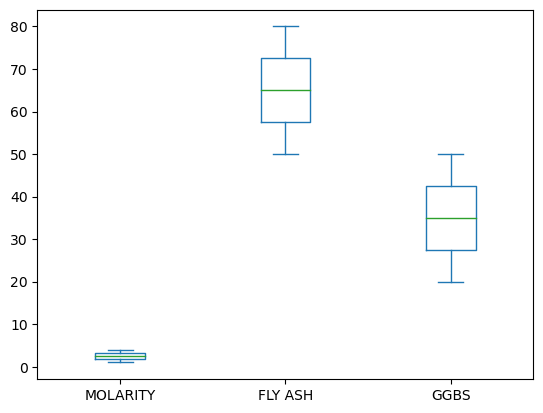

In [172]:
df1=pd.DataFrame(df,columns=["MOLARITY","FLY ASH","GGBS"])
df1.plot(kind="box")

Thus we see no outliers exist in the data

# Checking Data Distribution 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\manav\AppData\Local\Temp\ipykernel_1852\173142493.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MOLARITY'])


<IPython.core.display.Javascript object>

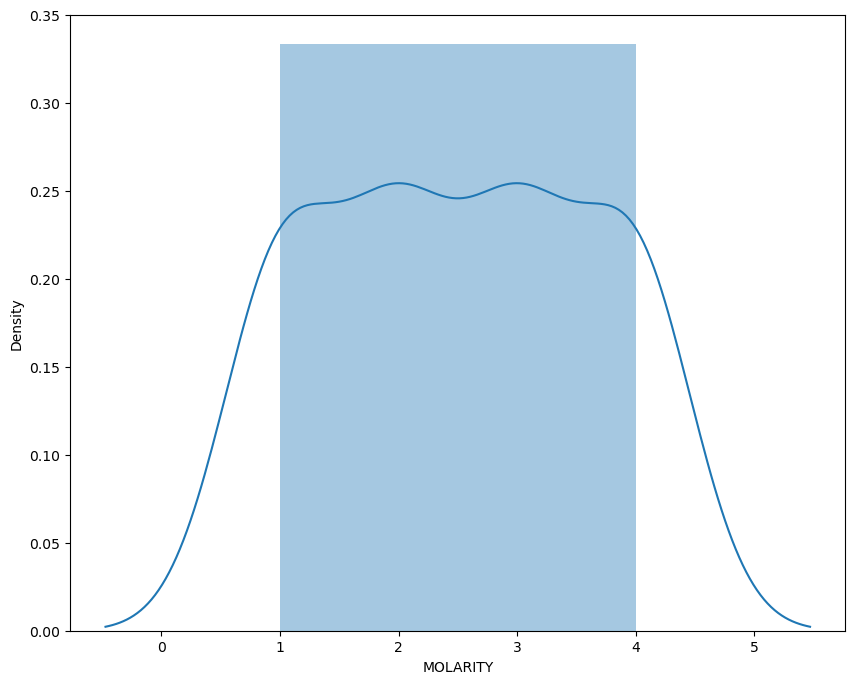

In [173]:
#displot

plt.figure(figsize=(10,8))
sns.distplot(df['MOLARITY'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\manav\AppData\Local\Temp\ipykernel_1852\2056115471.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['FLY ASH'])


<IPython.core.display.Javascript object>

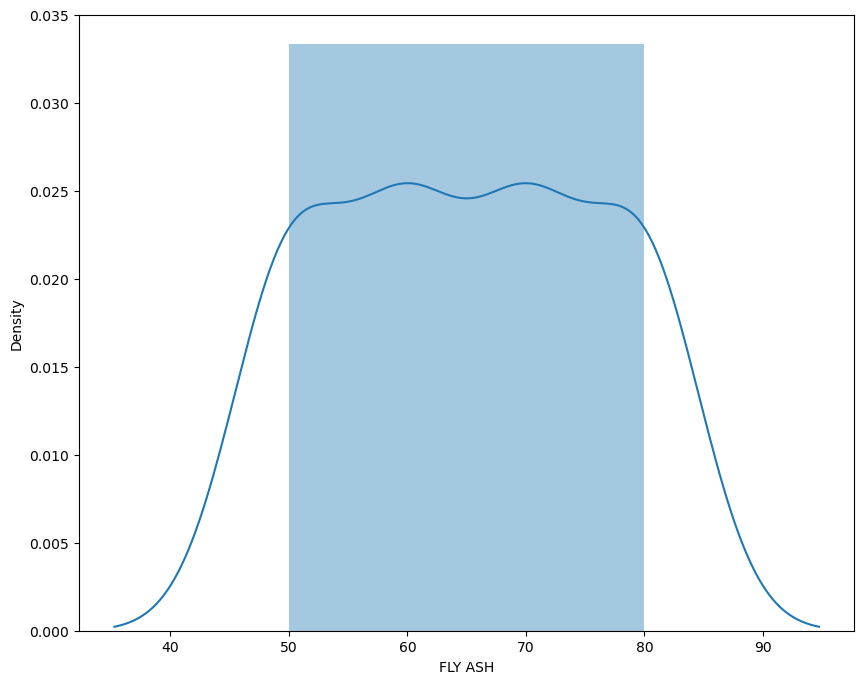

In [174]:
#displot

plt.figure(figsize=(10,8))
sns.distplot(df['FLY ASH'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\manav\AppData\Local\Temp\ipykernel_1852\1052900917.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GGBS'])


<IPython.core.display.Javascript object>

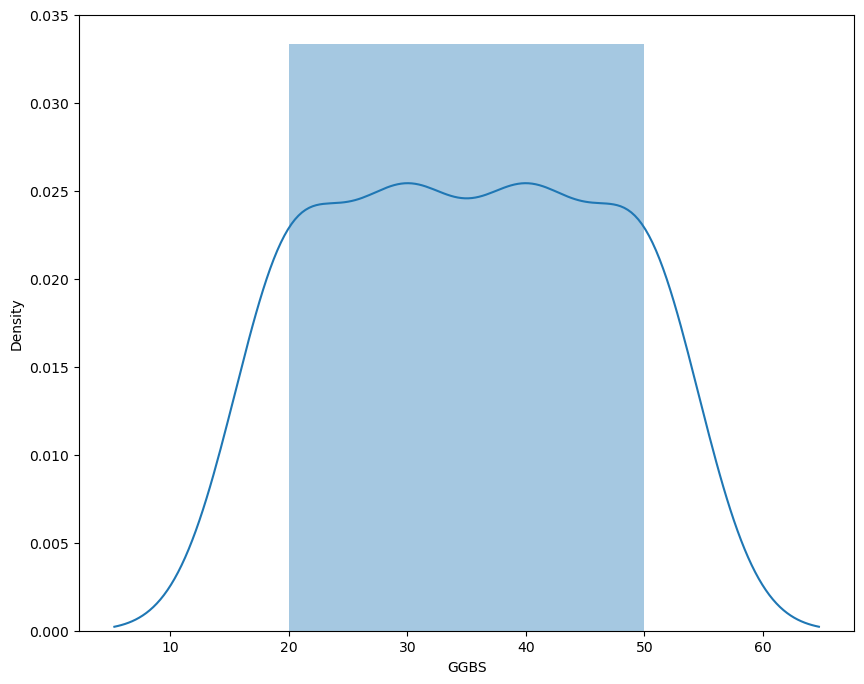

In [175]:
#displot

plt.figure(figsize=(10,8))
sns.distplot(df['GGBS'])
plt.show()

<IPython.core.display.Javascript object>

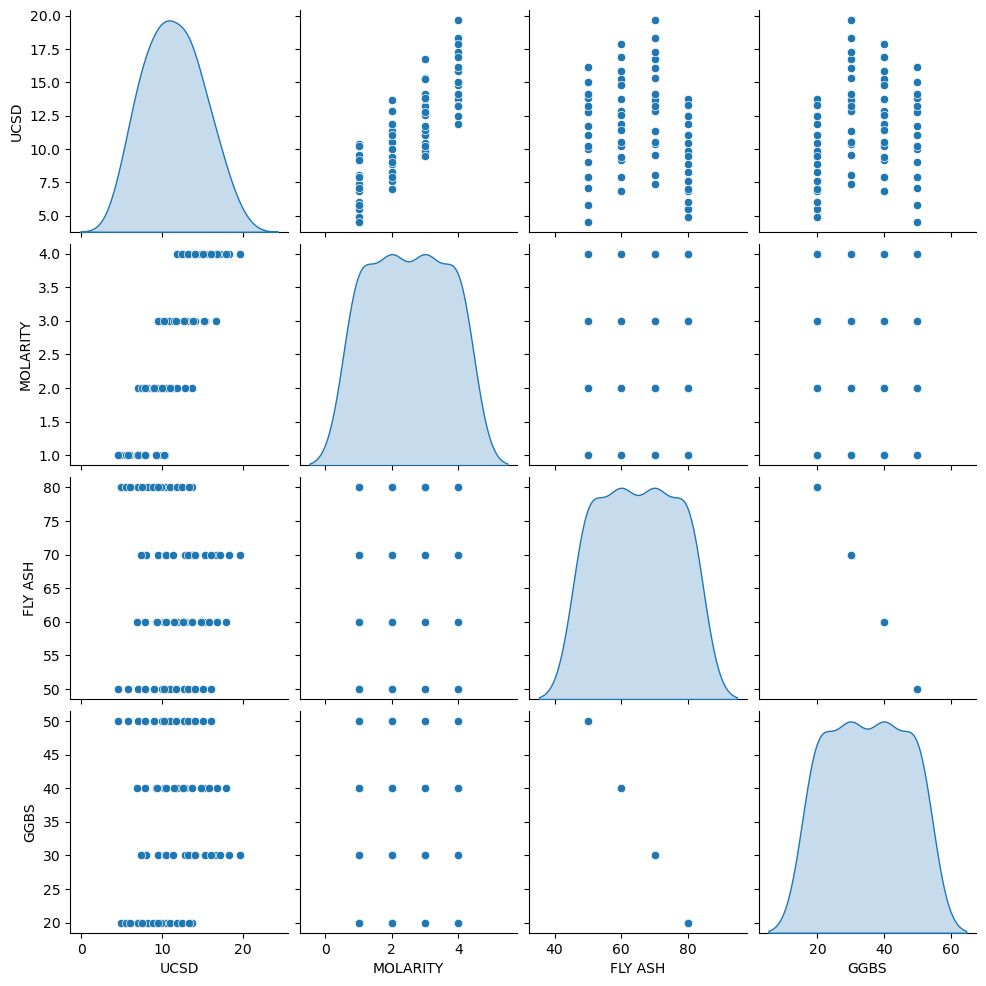

In [176]:
# pairplot.
#plot density curve instead of histogram in the diagonals

sns.pairplot(df, diag_kind='kde')

<IPython.core.display.Javascript object>

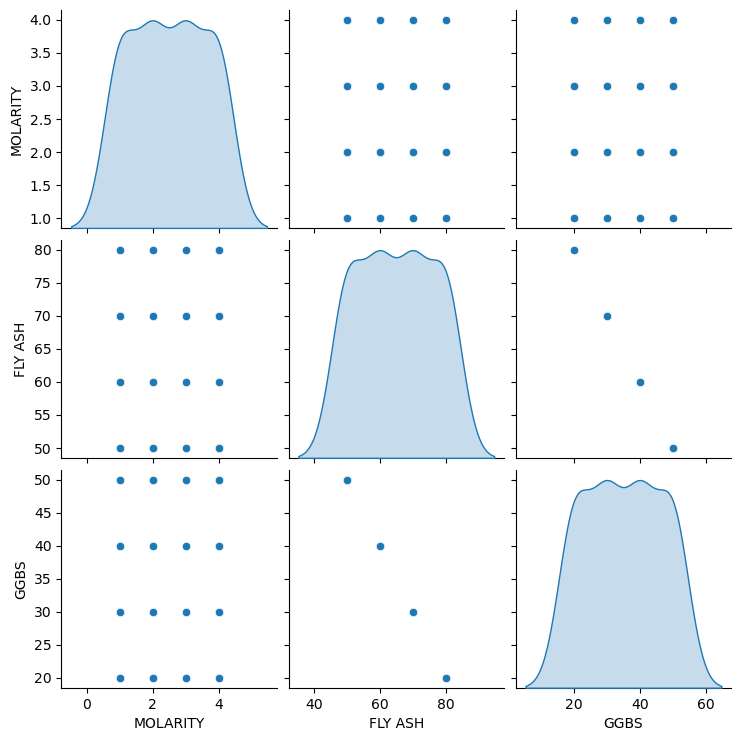

In [177]:
# pairplot.
#plot density curve instead of histogram in the diagonals

sns.pairplot(df1, diag_kind='kde')

There seems to be a linear relationship between GGBS and FLY ASH while other parameters are independent of each other. Also the parameters seem to assume particular values only rather than being randomly scattered

## Correlation between variables 

In [178]:
sns.set_context("poster",font_scale=.7)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

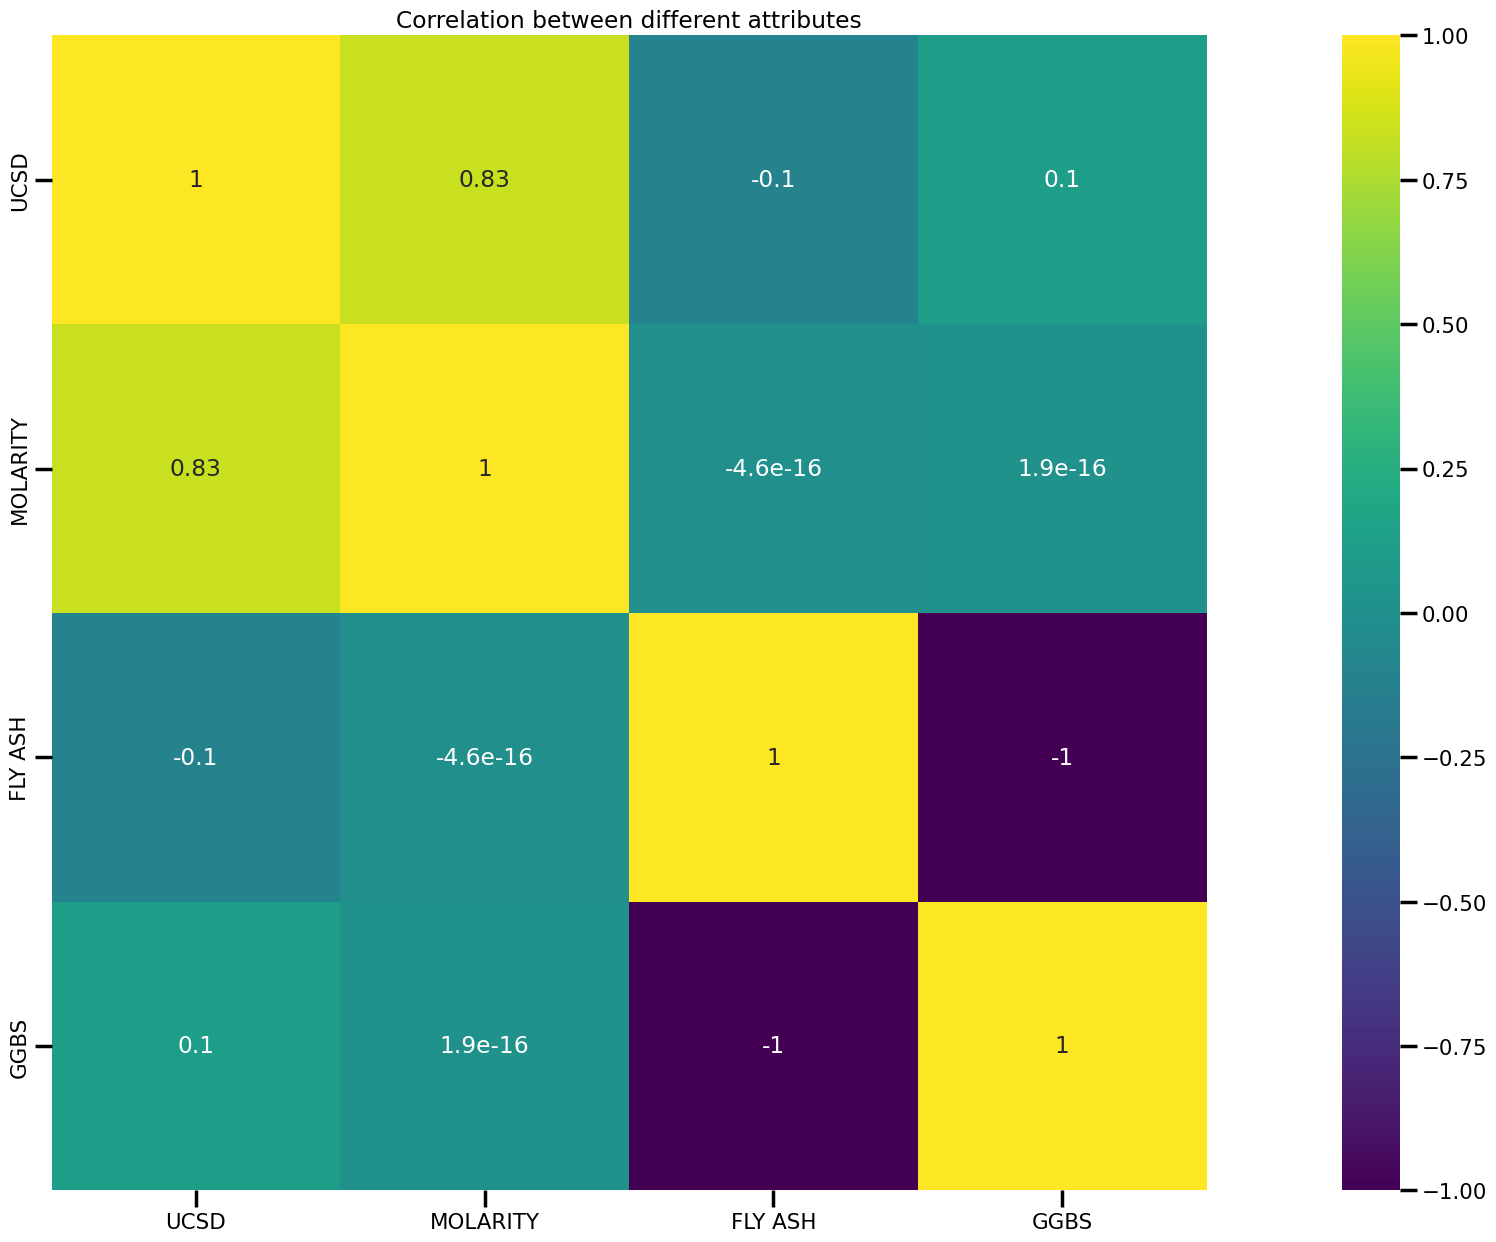

In [179]:
plt.figure(figsize=(35,15))

sns.heatmap(df.corr(),vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

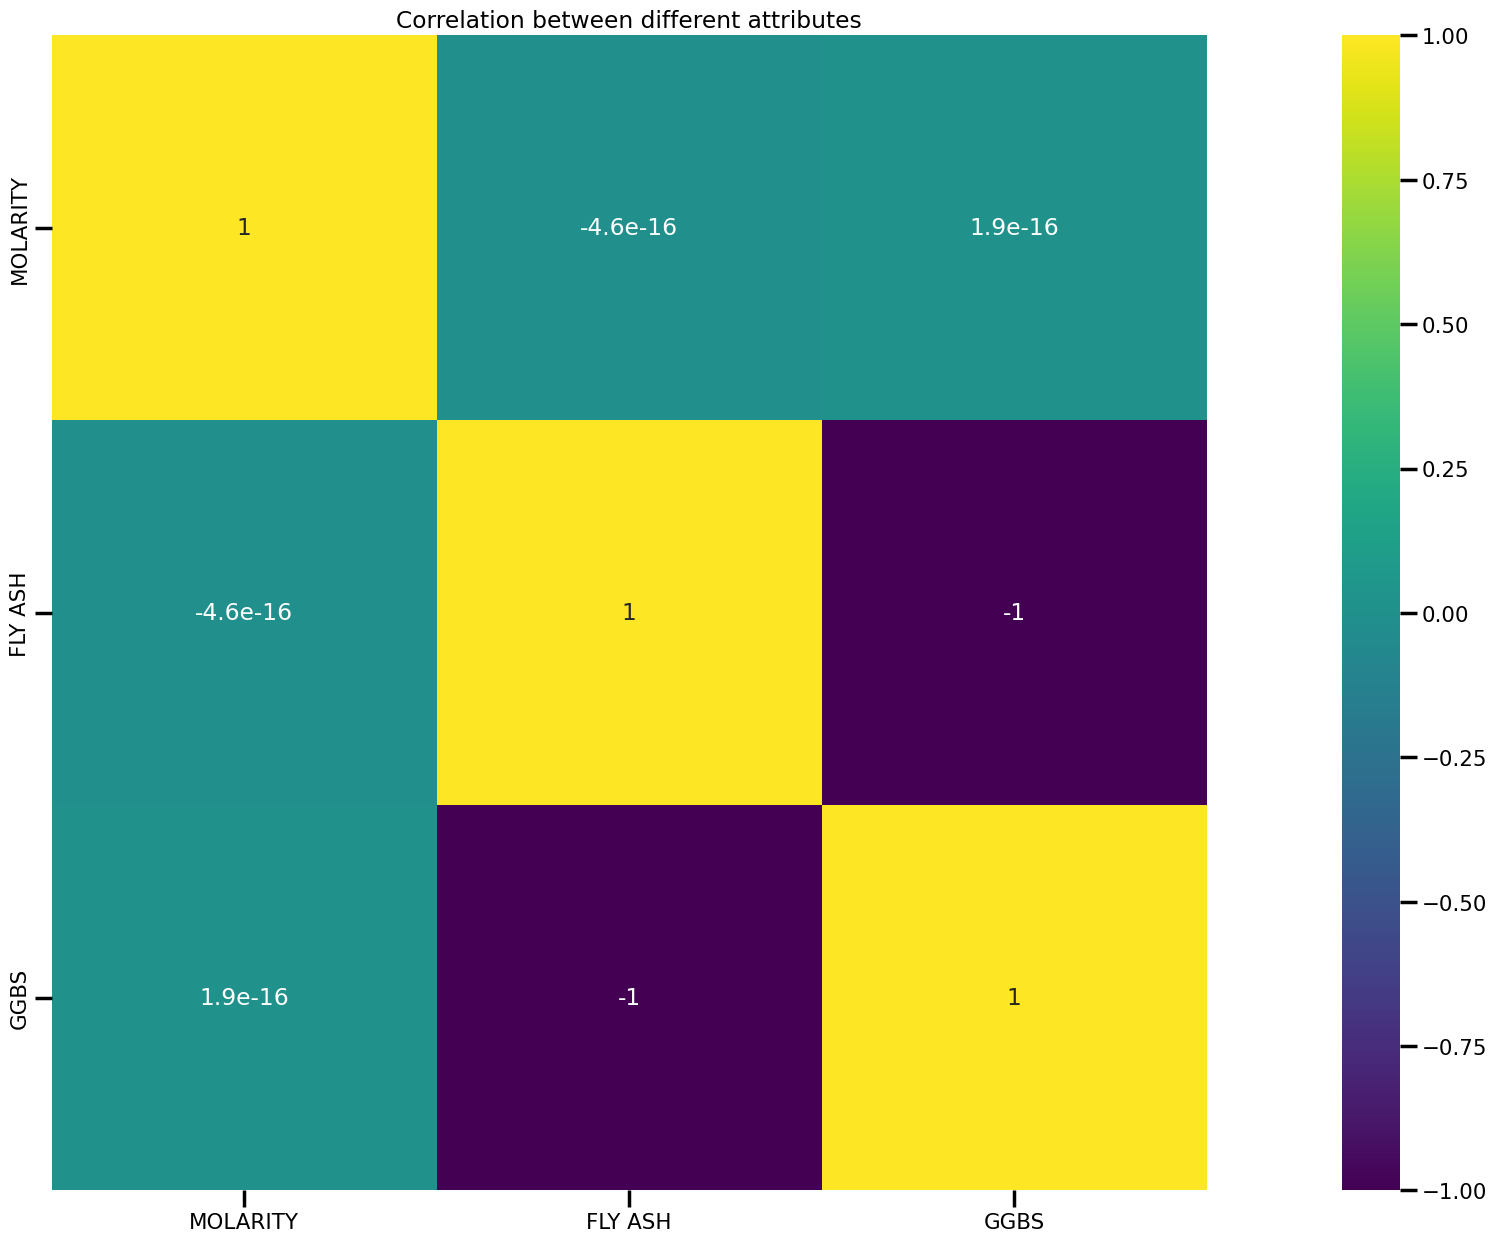

In [180]:
plt.figure(figsize=(35,15))

sns.heatmap(df1.corr(),vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

Thus we have verified our findings.
As GGBS and FLY ASH are perfectly correlated, we can drop one of them, hence lets drop GGBS

In [181]:
X = df.drop(columns=["UCSD","GGBS"], axis = 1)
y = df['UCSD']

In [182]:
X

,MOLARITY,FLY ASH
0,1,80
1,1,80
2,1,80
3,1,80
4,2,80
...,...,...
59,3,50
60,4,50
61,4,50
62,4,50


In [183]:
y

0      4.870
1      5.474
2      6.840
3      6.020
4      7.020
       ...  
59    13.840
60    13.250
61    16.120
62    15.040
63    14.150
Name: UCSD, Length: 64, dtype: float64

# Predictive Modelling 

In [184]:
from scipy.stats import zscore

Xscaled = X.apply(zscore)
Xscaled_df = pd.DataFrame(Xscaled, columns=df.columns)

<IPython.core.display.Javascript object>

In [185]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, test_size= 0.3, random_state= 1)

<IPython.core.display.Javascript object>

### Random Forest 

In [186]:
#100 n_estimators or tress by default
model=RandomForestRegressor()
model.fit(X_train,y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor()

In [187]:
y_pred=model.predict(X_test)

In [188]:
#Model Performance on Training Data

model.score(X_train, y_train)

# round(model.score(X_train, y_train)*100) #if you want to get the exact percentage, uncomment this one

0.9222435169276516

In [189]:
#Model Performance on Test Data

model.score(X_test, y_test)

# round(model.score(X_test, y_test)*100) #if you want to get the exact percentage, uncomment this one

0.7877872551848485

In [190]:
#Same as above
acc_R=metrics.r2_score(y_test, y_pred)
acc_R

<IPython.core.display.Javascript object>

0.7877872551848485

In [191]:
data = {'Algorithm': 'Random Forest', 'accuracy': acc_R}
data

{'Algorithm': 'Random Forest', 'accuracy': 0.7877872551848485}

In [192]:
#Store the accuracy results for each model in a dataframe for final comparison
results_1 = pd.DataFrame(({'Algorithm': ['Random Forest'], 'accuracy': [acc_R]}),index=['1'])
results = results_1[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.787787


### KFold Cross Validation

In [193]:
#we can use stratified k_fold as well
k=10
kfold=KFold(n_splits=k,random_state=70,shuffle=True)
K_results=cross_val_score(model,X,y,cv=kfold)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [194]:
K_results

array([0.91187207, 0.83916246, 0.59001891, 0.75698364, 0.90925169,
       0.83973306, 0.7763314 , 0.44810337, 0.53386802, 0.81054033])

In [195]:
accuracy=np.mean(abs(K_results))
accuracy

<IPython.core.display.Javascript object>

0.7415864950411185

In [196]:
#Store the accuracy results for each model in a dataframe for final comparison

random_re = pd.DataFrame({'Algorithm': ['Random Forest Regressor k_fold'], 'accuracy': accuracy},index=['2'])
results = pd.concat([results, random_re])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.787787
2,Random Forest Regressor k_fold,0.741586


## Gradient Boost Regressor 

In [197]:
model=GradientBoostingRegressor()

<IPython.core.display.Javascript object>

In [198]:
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [199]:
y_pred=model.predict(X_test)

In [200]:
#Model Performance on Training Data

model.score(X_train, y_train)

0.924613101814677

In [201]:
#Model performance on Test Data
acc_G=model.score(X_test,y_test)
acc_G

0.7797145795972499

In [202]:
gradient_re=pd.DataFrame({'Algorithm':'Gradient Boost Regressor','accuracy':acc_G},index=['3'])
results=pd.concat([results,gradient_re])
results=results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.787787
2,Random Forest Regressor k_fold,0.741586
3,Gradient Boost Regressor,0.779715


In [203]:
k=10
kfold=KFold(n_splits=k,random_state=70,shuffle=True)
results_3=cross_val_score(model,X,y,cv=kfold)
results_3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([0.90089904, 0.84880718, 0.62239255, 0.74166613, 0.91166881,
       0.8411404 , 0.80016248, 0.48886047, 0.52837308, 0.80883523])

In [204]:
accuracy=np.mean(abs(results_3))
accuracy

<IPython.core.display.Javascript object>

0.7492805373552232

In [205]:
#Store the accuracy results for each model in a dataframe for final comparison

gradient_k = pd.DataFrame({'Algorithm': ['Gradient Boost Regressor k fold'], 'accuracy': accuracy},index=['4'])
results = pd.concat([results, gradient_k])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.787787
2,Random Forest Regressor k_fold,0.741586
3,Gradient Boost Regressor,0.779715
4,Gradient Boost Regressor k fold,0.749281


#### Making function to get score and k_fold score 

In [206]:
def get_score(model):
    model.fit(X_train,y_train)
    print("model score on train data:",model.score(X_train,y_train))
    print("model score on test data:",model.score(X_test,y_test))
    model_score=model.score(X_test,y_test)
    return model_score

In [207]:
# def add_to_df(model_name,model_score,index,results=results):
#     acc=pd.DataFrame({'Algorithms':[str(model_name)],"accuracy":model_score},index=[str(index)])
#     results=pd.concat([results,acc])    
#     results = results[['Algorithm','accuracy']]
#     display(results)

In [208]:
def get_kfold_score(model):
    k=10
    kfold=KFold(n_splits=k,random_state=70,shuffle=True)
    results_4=cross_val_score(model,X,y,cv=kfold)
    print(results_4)
    accuracy=np.mean(results_4)
    print("kfold accuracy:",accuracy)
    return accuracy

## Ada Boost 

In [209]:
from sklearn.ensemble import AdaBoostRegressor

In [210]:
model_score=get_score(AdaBoostRegressor())

model score on train data: 0.8997284351286491
model score on test data: 0.7843267430504495


In [211]:
kfold_score=get_kfold_score(AdaBoostRegressor())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.88240962 0.78627235 0.70330863 0.82622379 0.91880107 0.76451134
 0.79809216 0.55213111 0.3107075  0.77519071]


<IPython.core.display.Javascript object>

kfold accuracy: 0.7317648275534736


In [212]:
acc_Ada = pd.DataFrame({'Algorithm': ['Ada Boost Regressor'], 'accuracy': model_score},index=['5'])
results = pd.concat([results, acc_Ada])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.787787
2,Random Forest Regressor k_fold,0.741586
3,Gradient Boost Regressor,0.779715
4,Gradient Boost Regressor k fold,0.749281
5,Ada Boost Regressor,0.784327


In [213]:
acc_AdaC = pd.DataFrame({'Algorithm': ['Ada Boost Regressor k fold'], 'accuracy': kfold_score},index=['6'])
results = pd.concat([results, acc_AdaC])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.787787
2,Random Forest Regressor k_fold,0.741586
3,Gradient Boost Regressor,0.779715
4,Gradient Boost Regressor k fold,0.749281
5,Ada Boost Regressor,0.784327
6,Ada Boost Regressor k fold,0.731765


## KNN Regressor 

In [214]:
X.shape

(64, 2)

In [215]:
#checking for the best k
from sklearn.neighbors import KNeighborsRegressor

acc_k=[]
for i in range(1,20):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    acc_k.append(knn.score(X_test,y_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Mean errors')

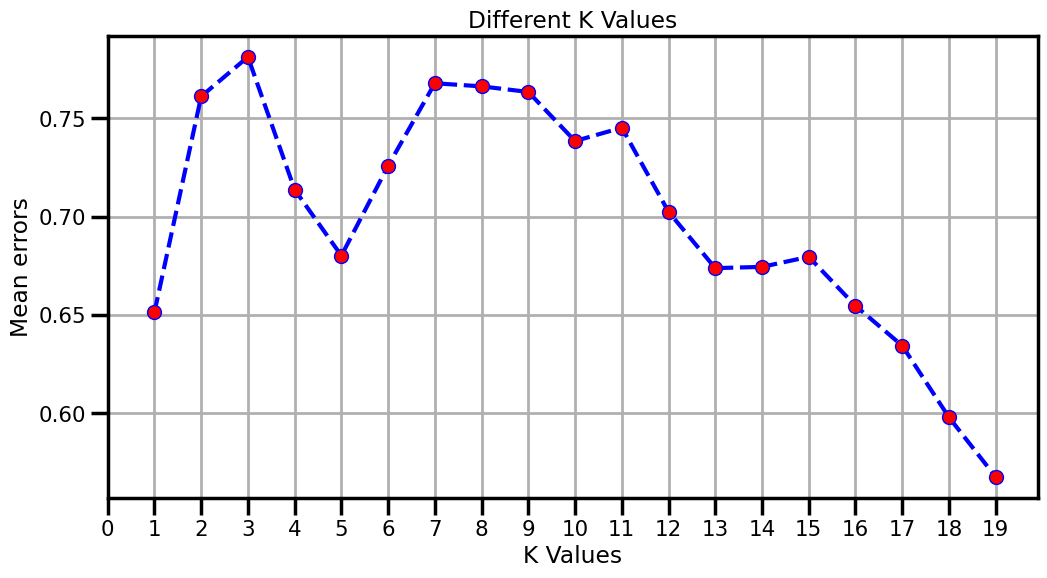

In [216]:
plt.figure(figsize=(12,6))
plt.plot(range(1,20),acc_k,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.grid()
plt.xticks(np.arange(0,20))
# plt.yticks(np.arange(0,2,.1))
plt.title('Different K Values')
plt.xlabel('K Values')
plt.ylabel('Mean errors')

In [217]:
acc_k.index(max(acc_k))

2

3 seems a good choice for k

In [218]:
model_score=get_score(KNeighborsRegressor(n_neighbors=3))

model score on train data: 0.8867797935741029
model score on test data: 0.7810820396334204


In [219]:
kfold_score=get_kfold_score(KNeighborsRegressor(n_neighbors=3))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.90102751 0.8327888  0.4464359  0.87191198 0.91169879 0.82097004
 0.78512298 0.19857119 0.74858134 0.80809633]


<IPython.core.display.Javascript object>

kfold accuracy: 0.7325204852210324


In [220]:
KNN_df = pd.DataFrame({'Algorithm':['KNN Regressor'], 'accuracy': [model_score]}, index=['7'])
results = pd.concat([results, KNN_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.787787
2,Random Forest Regressor k_fold,0.741586
3,Gradient Boost Regressor,0.779715
4,Gradient Boost Regressor k fold,0.749281
5,Ada Boost Regressor,0.784327
6,Ada Boost Regressor k fold,0.731765
7,KNN Regressor,0.781082


In [221]:
#Store the accuracy results for each model in a dataframe for final comparison

KNNfold_df = pd.DataFrame({'Algorithm': ['KNN Regressor k fold'], 'accuracy': kfold_score},index=['8'])
results = pd.concat([results, KNNfold_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.787787
2,Random Forest Regressor k_fold,0.741586
3,Gradient Boost Regressor,0.779715
4,Gradient Boost Regressor k fold,0.749281
5,Ada Boost Regressor,0.784327
6,Ada Boost Regressor k fold,0.731765
7,KNN Regressor,0.781082
8,KNN Regressor k fold,0.732520


## Bagging Regressor 

In [222]:
from sklearn.ensemble import BaggingRegressor

In [223]:
model_score=get_score(BaggingRegressor())

model score on train data: 0.9157920801377758
model score on test data: 0.8068238614005729


In [224]:
kfold_score=get_kfold_score(BaggingRegressor())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.89220701 0.82466857 0.54253923 0.78549662 0.90295335 0.82567057
 0.73357044 0.38103912 0.49480856 0.77913355]


<IPython.core.display.Javascript object>

kfold accuracy: 0.7162087012192634


In [225]:
Bagging_df=pd.DataFrame({"Algorithm":"Bagging Regressor","accuracy":model_score},index=['9'])
results=pd.concat([results,Bagging_df])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.787787
2,Random Forest Regressor k_fold,0.741586
3,Gradient Boost Regressor,0.779715
4,Gradient Boost Regressor k fold,0.749281
5,Ada Boost Regressor,0.784327
6,Ada Boost Regressor k fold,0.731765
7,KNN Regressor,0.781082
8,KNN Regressor k fold,0.732520
9,Bagging Regressor,0.806824


In [226]:
BaggingKFold_df = pd.DataFrame({'Algorithm': ['Bagging Regressor k fold'], 'accuracy': accuracy},index=['10'])
results = pd.concat([results, BaggingKFold_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.787787
2,Random Forest Regressor k_fold,0.741586
3,Gradient Boost Regressor,0.779715
4,Gradient Boost Regressor k fold,0.749281
5,Ada Boost Regressor,0.784327
6,Ada Boost Regressor k fold,0.731765
7,KNN Regressor,0.781082
8,KNN Regressor k fold,0.732520
9,Bagging Regressor,0.806824
10,Bagging Regressor k fold,0.749281


## Support Vector Regressor 

In [227]:
from sklearn.svm import SVR
model=SVR(kernel="linear")

In [228]:
model_score=get_score(model)

model score on train data: 0.6556198951649548
model score on test data: 0.6657330995020632


In [229]:
kfold_score=get_kfold_score(model)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.87002025 0.70219851 0.45037071 0.50864847 0.82509593 0.52262076
 0.74757402 0.10819735 0.13361434 0.58668772]


<IPython.core.display.Javascript object>

kfold accuracy: 0.54550280450317


In [230]:
SVR_df = pd.DataFrame({'Algorithm': ['Support Vector Regressor','Support Vector Regressor k fold'], 'accuracy':[model_score,kfold_score]},index=['11','12'])
results = pd.concat([results, SVR_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.787787
2,Random Forest Regressor k_fold,0.741586
3,Gradient Boost Regressor,0.779715
4,Gradient Boost Regressor k fold,0.749281
5,Ada Boost Regressor,0.784327
6,Ada Boost Regressor k fold,0.731765
7,KNN Regressor,0.781082
8,KNN Regressor k fold,0.732520
9,Bagging Regressor,0.806824
10,Bagging Regressor k fold,0.749281


## XGBoost Regressor 

In [231]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [232]:
xgr=XGBRegressor()

In [233]:
model_score=get_score(xgr)

model score on train data: 0.9258276415493361
model score on test data: 0.7375434607504281


In [234]:
kfold_score=get_kfold_score(xgr)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.90106361 0.8419691  0.60367874 0.73247541 0.91172143 0.8341505
 0.7858317  0.47654347 0.5149813  0.80815073]


<IPython.core.display.Javascript object>

kfold accuracy: 0.7410565987942082


In [235]:
XGB_df = pd.DataFrame({'Algorithm': ['XGBoost Regressor','XGBoost Regressor k_fold'], 'accuracy': [model_score,kfold_score]},index=['13','14'])
results = pd.concat([results, XGB_df])
display(results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.787787
2,Random Forest Regressor k_fold,0.741586
3,Gradient Boost Regressor,0.779715
4,Gradient Boost Regressor k fold,0.749281
5,Ada Boost Regressor,0.784327
6,Ada Boost Regressor k fold,0.731765
7,KNN Regressor,0.781082
8,KNN Regressor k fold,0.732520
9,Bagging Regressor,0.806824
10,Bagging Regressor k fold,0.749281


## Decision Tree Regressor 

In [236]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [237]:
print('Feature Importance: \n',pd.DataFrame(model.feature_importances_,columns=['Importance'],index=[X_train.columns]))

<IPython.core.display.Javascript object>

Feature Importance: 
           Importance
MOLARITY    0.672845
FLY ASH     0.327155


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

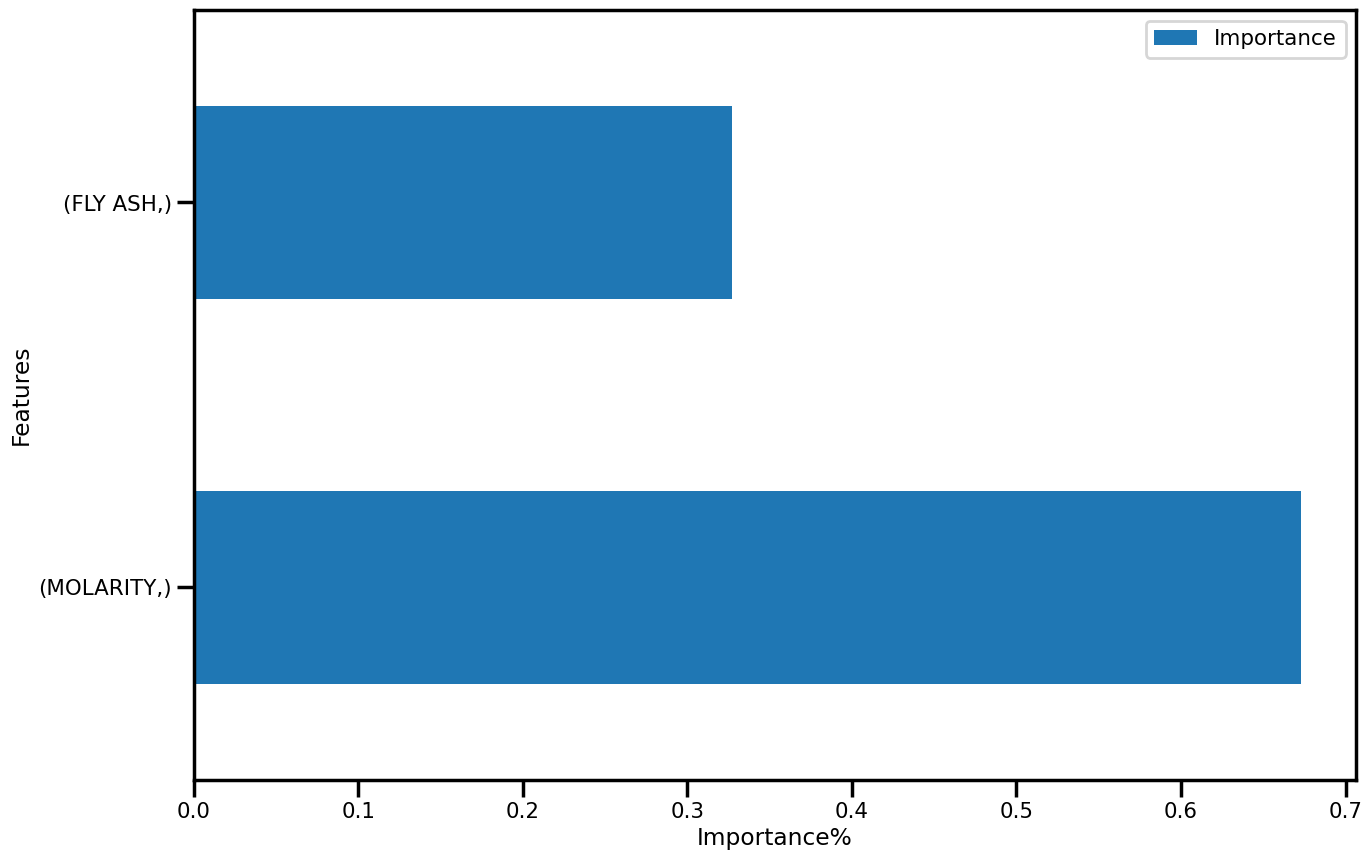

In [238]:
df_featureimp=pd.DataFrame(model.feature_importances_,columns=['Importance'],index=[X_train.columns])
df_featureimp.plot(kind="barh",figsize=(15,10))
plt.xlabel("Importance%")
plt.ylabel("Features")
plt.yticks=[X_train.columns]

Thus we can observe that <b>MOLARITY</b> is the most import feature in prediction

In [239]:
model_score=model.score(X_test,y_test)
model_score

0.7371003627946088

In [240]:
kfold_score=get_kfold_score(model)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.90102751 0.84190044 0.6033436  0.73220437 0.91169879 0.83413489
 0.78571396 0.47659034 0.51469207 0.80809633]


<IPython.core.display.Javascript object>

kfold accuracy: 0.7409402285919773


In [241]:
DT_df=pd.DataFrame({'Algorithm':['Decision Tree Regressor 1','Decision Tree Regressor 1 k_fold'],'accuracy':[model_score,kfold_score]},index=['15','16'])
results=pd.concat([results,DT_df])
display(results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.787787
2,Random Forest Regressor k_fold,0.741586
3,Gradient Boost Regressor,0.779715
4,Gradient Boost Regressor k fold,0.749281
5,Ada Boost Regressor,0.784327
6,Ada Boost Regressor k fold,0.731765
7,KNN Regressor,0.781082
8,KNN Regressor k fold,0.732520
9,Bagging Regressor,0.806824
10,Bagging Regressor k fold,0.749281


# Feature Selection

In [242]:
df

,UCSD,MOLARITY,FLY ASH,GGBS
0,4.870,1,80,20
1,5.474,1,80,20
2,6.840,1,80,20
3,6.020,1,80,20
4,7.020,2,80,20
...,...,...,...,...
59,13.840,3,50,50
60,13.250,4,50,50
61,16.120,4,50,50
62,15.040,4,50,50


In [243]:
df2 = df.copy() #create a copy of df in order to drop the least important features and work on only the important features

In [244]:
X1 = df2.drop(['UCSD','FLY ASH','GGBS'],axis=1)
y1 = df2['UCSD']
#Split the X1 and y1 into training and test set in 70:30 ratio
X1_train,X1_test, y1_train,y1_test = train_test_split(X1,y1, test_size=0.3,random_state = 1)

<IPython.core.display.Javascript object>

In [245]:
X1_train = X1_train.apply(zscore)
X1_test = X1_test.apply(zscore)

## Decision Tree Regressor 2

In [246]:
decNew_Model = DecisionTreeRegressor()
decNew_Model.fit(X1_train, y1_train)

DecisionTreeRegressor()

In [247]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(decNew_Model.feature_importances_,columns=['Importance'],index=X1_train.columns))

<IPython.core.display.Javascript object>

Feature importance: 
           Importance
MOLARITY         1.0


In [248]:
model_score=decNew_Model.score(X1_train, y1_train)
model_score

0.6554816037654172

In [249]:
DT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor 2'], 'accuracy': model_score},index=['17'])
results = pd.concat([results, DT_df])
display(results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.787787
2,Random Forest Regressor k_fold,0.741586
3,Gradient Boost Regressor,0.779715
4,Gradient Boost Regressor k fold,0.749281
5,Ada Boost Regressor,0.784327
6,Ada Boost Regressor k fold,0.731765
7,KNN Regressor,0.781082
8,KNN Regressor k fold,0.732520
9,Bagging Regressor,0.806824
10,Bagging Regressor k fold,0.749281


In [250]:
k = 10

kfold = KFold(n_splits=k, random_state=70,shuffle= True)
results_9 = cross_val_score(decNew_Model, X1, y1, cv=kfold)
accuracy=np.mean(abs(results_9))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.5597005300218872

In [251]:
DCT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor 2 k_fold'], 'accuracy': accuracy},index=['18'])
results = pd.concat([results, DCT_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.787787
2,Random Forest Regressor k_fold,0.741586
3,Gradient Boost Regressor,0.779715
4,Gradient Boost Regressor k fold,0.749281
5,Ada Boost Regressor,0.784327
6,Ada Boost Regressor k fold,0.731765
7,KNN Regressor,0.781082
8,KNN Regressor k fold,0.732520
9,Bagging Regressor,0.806824
10,Bagging Regressor k fold,0.749281


## Pruned Decision Tree Regressor 

In [252]:
dec_prun_model=DecisionTreeRegressor(max_depth=4, random_state=1,min_samples_leaf=5)

In [253]:
model_score=get_score(dec_prun_model)

model score on train data: 0.7791842442841563
model score on test data: 0.659823515502749


In [254]:
kfold_score=get_kfold_score(dec_prun_model)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[ 0.74962079  0.73034965  0.16738701  0.61186643  0.87710702  0.66806942
  0.38795892 -0.15289228  0.07105027  0.42138541]


<IPython.core.display.Javascript object>

kfold accuracy: 0.4531902642953721


In [255]:
dec_prun_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=1)

In [256]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(dec_prun_model.feature_importances_,columns=['Importance'],index=X_train.columns))

<IPython.core.display.Javascript object>

Feature importance: 
           Importance
MOLARITY    0.764926
FLY ASH     0.235074


### Plotting the Decision Tree 

In [257]:
!pip install graphviz

In [258]:
!pip install pydot

In [259]:
!pip install six

In [260]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import graphviz
import pydot

In [261]:
Xscaled2_df=Xscaled_df.drop(['UCSD','GGBS'],axis=1)
feature_cols = Xscaled2_df.columns

In [262]:
feature_cols

Index(['MOLARITY', 'FLY ASH'], dtype='object')

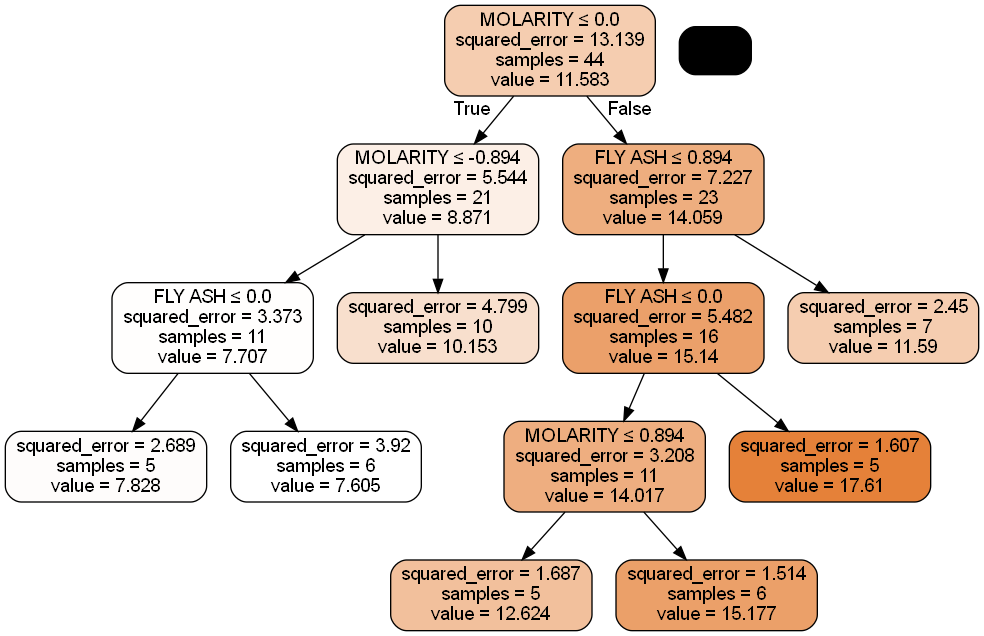

In [263]:
dot_data=StringIO()
export_graphviz(dec_prun_model,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True,
               feature_names=feature_cols,class_names=['0','1'])
(graph,)=pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png('UCSd_pruned.png')
Image(graph.create_png())

In [264]:
DecT_df = pd.DataFrame({'Algorithm': ['Pruned Decision Tree','Pruned Decision Tree k_fold'], 'accuracy': [model_score,kfold_score]},index=['19','20'])
results = pd.concat([results, DecT_df])
display(results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.787787
2,Random Forest Regressor k_fold,0.741586
3,Gradient Boost Regressor,0.779715
4,Gradient Boost Regressor k fold,0.749281
5,Ada Boost Regressor,0.784327
6,Ada Boost Regressor k fold,0.731765
7,KNN Regressor,0.781082
8,KNN Regressor k fold,0.732520
9,Bagging Regressor,0.806824
10,Bagging Regressor k fold,0.749281


<b>KNN Regressor, Random Forest, AdaBoost Regressor</b> are the best models for modelling %WeightLoss. We can work with either of them. 

# Regression using ANN 

## Hyperparameter Tuning

In [265]:
from keras.models import Sequential
from keras.layers import Dense

def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=128, kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
            y_pred=model.predict(X_test)
           
            y_pred=np.array(y_pred[:][:])
            y_test=np.reshape(y_test,(-1,1))
            err=abs(y_test-y_pred)
            err/=y_test
            MAPE=np.mean(err)*100
#             MAPE = np.mean(100 * (np.abs(y_test-y_pred)/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=pd.concat([SearchResultsData,pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] )])
    return(SearchResultsData)
 
 
######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1/1 [==============================] - 0s 88ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 14.857925602260678
1/1 [==============================] - 0s 80ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 68.26514702403938
1/1 [==============================] - 0s 109ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 83.42655762281055
1/1 [==============================] - 0s 89ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 84.29766449271253
1/1 [==============================] - 0s 67ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 2.8321301191626844
1/1 [==============================] - 0s 90ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 20.682100235659334
1/1 [==============================] - 0s 90ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 80.46308457680618
1/1 [==============================] - 0s 91ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 83.98698121568651
1/1 [==============================] - 0s 77ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 1.8215478952181172
1/1 [==============================] - 0s 70ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 5.23528237960808
1/1 [==============================] - 0s 87ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 76.16574643926813
1/1 [==============================] - 0s 90ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 81.80193803315836
1/1 [==============================] - 0s 58ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 1.338574719490282
1/1 [==============================] - 0s 100ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 5.050338839372671
1/1 [==============================] - 0s 60ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

15 Parameters: batch_size: 20 - epochs: 50 Accuracy: 77.24946220812052
1/1 [==============================] - 0s 89ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

16 Parameters: batch_size: 20 - epochs: 100 Accuracy: 80.8274771530726


### Choosing best parameters

We can even use <b>keras tuner</b> to optimise the no. of hidden layers and learning rate

<Axes: xlabel='Parameters'>

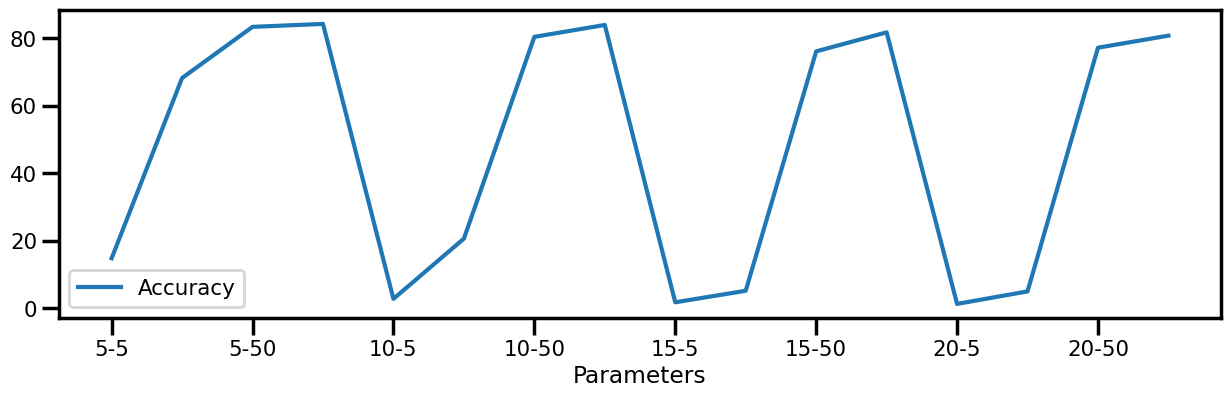

In [266]:
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

## Regressor with optimized parameters 

In [267]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(units=128,kernel_initializer="normal",activation="relu"))
model.add(Dense(units=64,kernel_initializer="normal",activation="tanh"))
model.add(Dense(1,kernel_initializer="normal"))
model.compile(loss="mean_squared_error",optimizer="adam")
model.fit(X_train,y_train,batch_size=5,epochs=50,verbose=1)

Epoch 1/50
9/9 [==============================] - 1s 2ms/step - loss: 145.9174
Epoch 2/50
9/9 [==============================] - 0s 2ms/step - loss: 142.0125
Epoch 3/50
9/9 [==============================] - 0s 2ms/step - loss: 135.6314
Epoch 4/50
9/9 [==============================] - 0s 2ms/step - loss: 125.3382
Epoch 5/50
9/9 [==============================] - 0s 2ms/step - loss: 109.3943
Epoch 6/50
9/9 [==============================] - 0s 2ms/step - loss: 88.8512
Epoch 7/50
9/9 [==============================] - 0s 2ms/step - loss: 67.5095
Epoch 8/50
9/9 [==============================] - 0s 3ms/step - loss: 47.9699
Epoch 9/50
9/9 [==============================] - 0s 2ms/step - loss: 33.9255
Epoch 10/50
9/9 [==============================] - 0s 2ms/step - loss: 24.8577
Epoch 11/50
9/9 [==============================] - 0s 1ms/step - loss: 19.6620
Epoch 12/50
9/9 [==============================] - 0s 852us/step - loss: 16.0574
Epoch 13/50
9/9 [==============================] - 0s 

In [268]:
y_pred_ANN_manual=model.predict(X_test)

1/1 [==============================] - 0s 116ms/step


In [269]:
acc_ANN=metrics.r2_score(y_test,y_pred)
acc_ANN

<IPython.core.display.Javascript object>

0.7797145795972499

In [270]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

2.6036330432500194

In [271]:
ANN_re = pd.DataFrame({'Algorithm': ['ANN Manually Tuned'], 'accuracy': acc_ANN},index=['21'])
results = pd.concat([results, ANN_re])
display(results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.787787
2,Random Forest Regressor k_fold,0.741586
3,Gradient Boost Regressor,0.779715
4,Gradient Boost Regressor k fold,0.749281
5,Ada Boost Regressor,0.784327
6,Ada Boost Regressor k fold,0.731765
7,KNN Regressor,0.781082
8,KNN Regressor k fold,0.732520
9,Bagging Regressor,0.806824
10,Bagging Regressor k fold,0.749281


# Regression with Sklearn ANN or MLP(Multi-Layer Perceptron) 

In [272]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [273]:
model = MLPRegressor(hidden_layer_sizes=(128,64), activation='relu', solver='adam', max_iter=10000)
model.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=10000)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

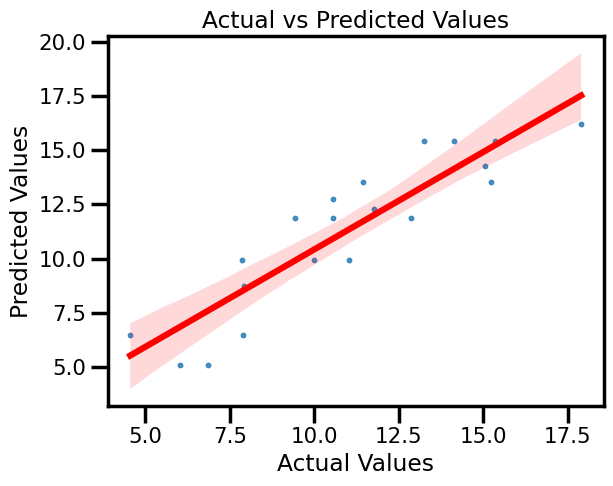

In [274]:
# Predict values for testing set
y_pred_MLP = model.predict(X_test)

# Create regression plot with actual and predicted values
sns.regplot(x=y_test, y=y_pred_MLP, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

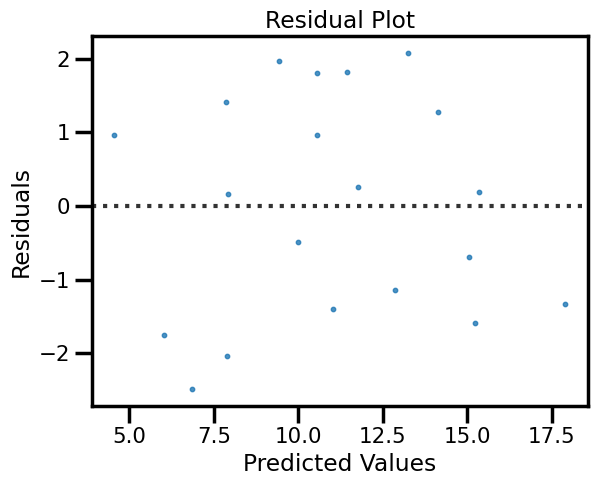

In [275]:
# Create residual plot with actual and predicted values
sns.residplot(x=y_test, y=y_pred_MLP, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [276]:
model_score=model.score(X_test,y_test)
model_score

0.802931228044179

In [277]:
kfold_score=get_kfold_score(model)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[ 0.86384213 -0.59400027  0.4996303   0.63673407 -0.812367   -0.61161951
  0.60876486 -0.10310257  0.09044429  0.60673969]


<IPython.core.display.Javascript object>

kfold accuracy: 0.11850659873235392


In [278]:
gradient_re = pd.DataFrame({'Algorithm': ['ANN:Scikit-Learn MLP','ANN:Scikit-Learn MLP k_fold'], 'accuracy': [model_score,kfold_score]},index=['22','23'])
results = pd.concat([results, gradient_re])
display(results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.787787
2,Random Forest Regressor k_fold,0.741586
3,Gradient Boost Regressor,0.779715
4,Gradient Boost Regressor k fold,0.749281
5,Ada Boost Regressor,0.784327
6,Ada Boost Regressor k fold,0.731765
7,KNN Regressor,0.781082
8,KNN Regressor k fold,0.732520
9,Bagging Regressor,0.806824
10,Bagging Regressor k fold,0.749281


Best models are: 
<b>ANN Manually Tuned, ANN:Scikit-Learn MLP, KNN Regressor,Ada Boost Regressor,Gradient Boost Regressor, Random Forest</b>
    

Thus we see that the <b>ANN Manually Trained, MLP(ANN), KNN Regressor, Random Forest,Ada Boost Regressor,Gradient Boost Regressor,Bagging Regressor,XGBoost Regressor,Decision Tree Regressor 1 </b> are performing good on the test data.

# Plotting

In [279]:
df

,UCSD,MOLARITY,FLY ASH,GGBS
0,4.870,1,80,20
1,5.474,1,80,20
2,6.840,1,80,20
3,6.020,1,80,20
4,7.020,2,80,20
...,...,...,...,...
59,13.840,3,50,50
60,13.250,4,50,50
61,16.120,4,50,50
62,15.040,4,50,50


## Actual vs Prediction Plots

In [280]:
import matplotlib.pyplot as plt
plt.rcdefaults()

SMALL_SIZE = 22
MEDIUM_SIZE = 20
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Type 1 Plots 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

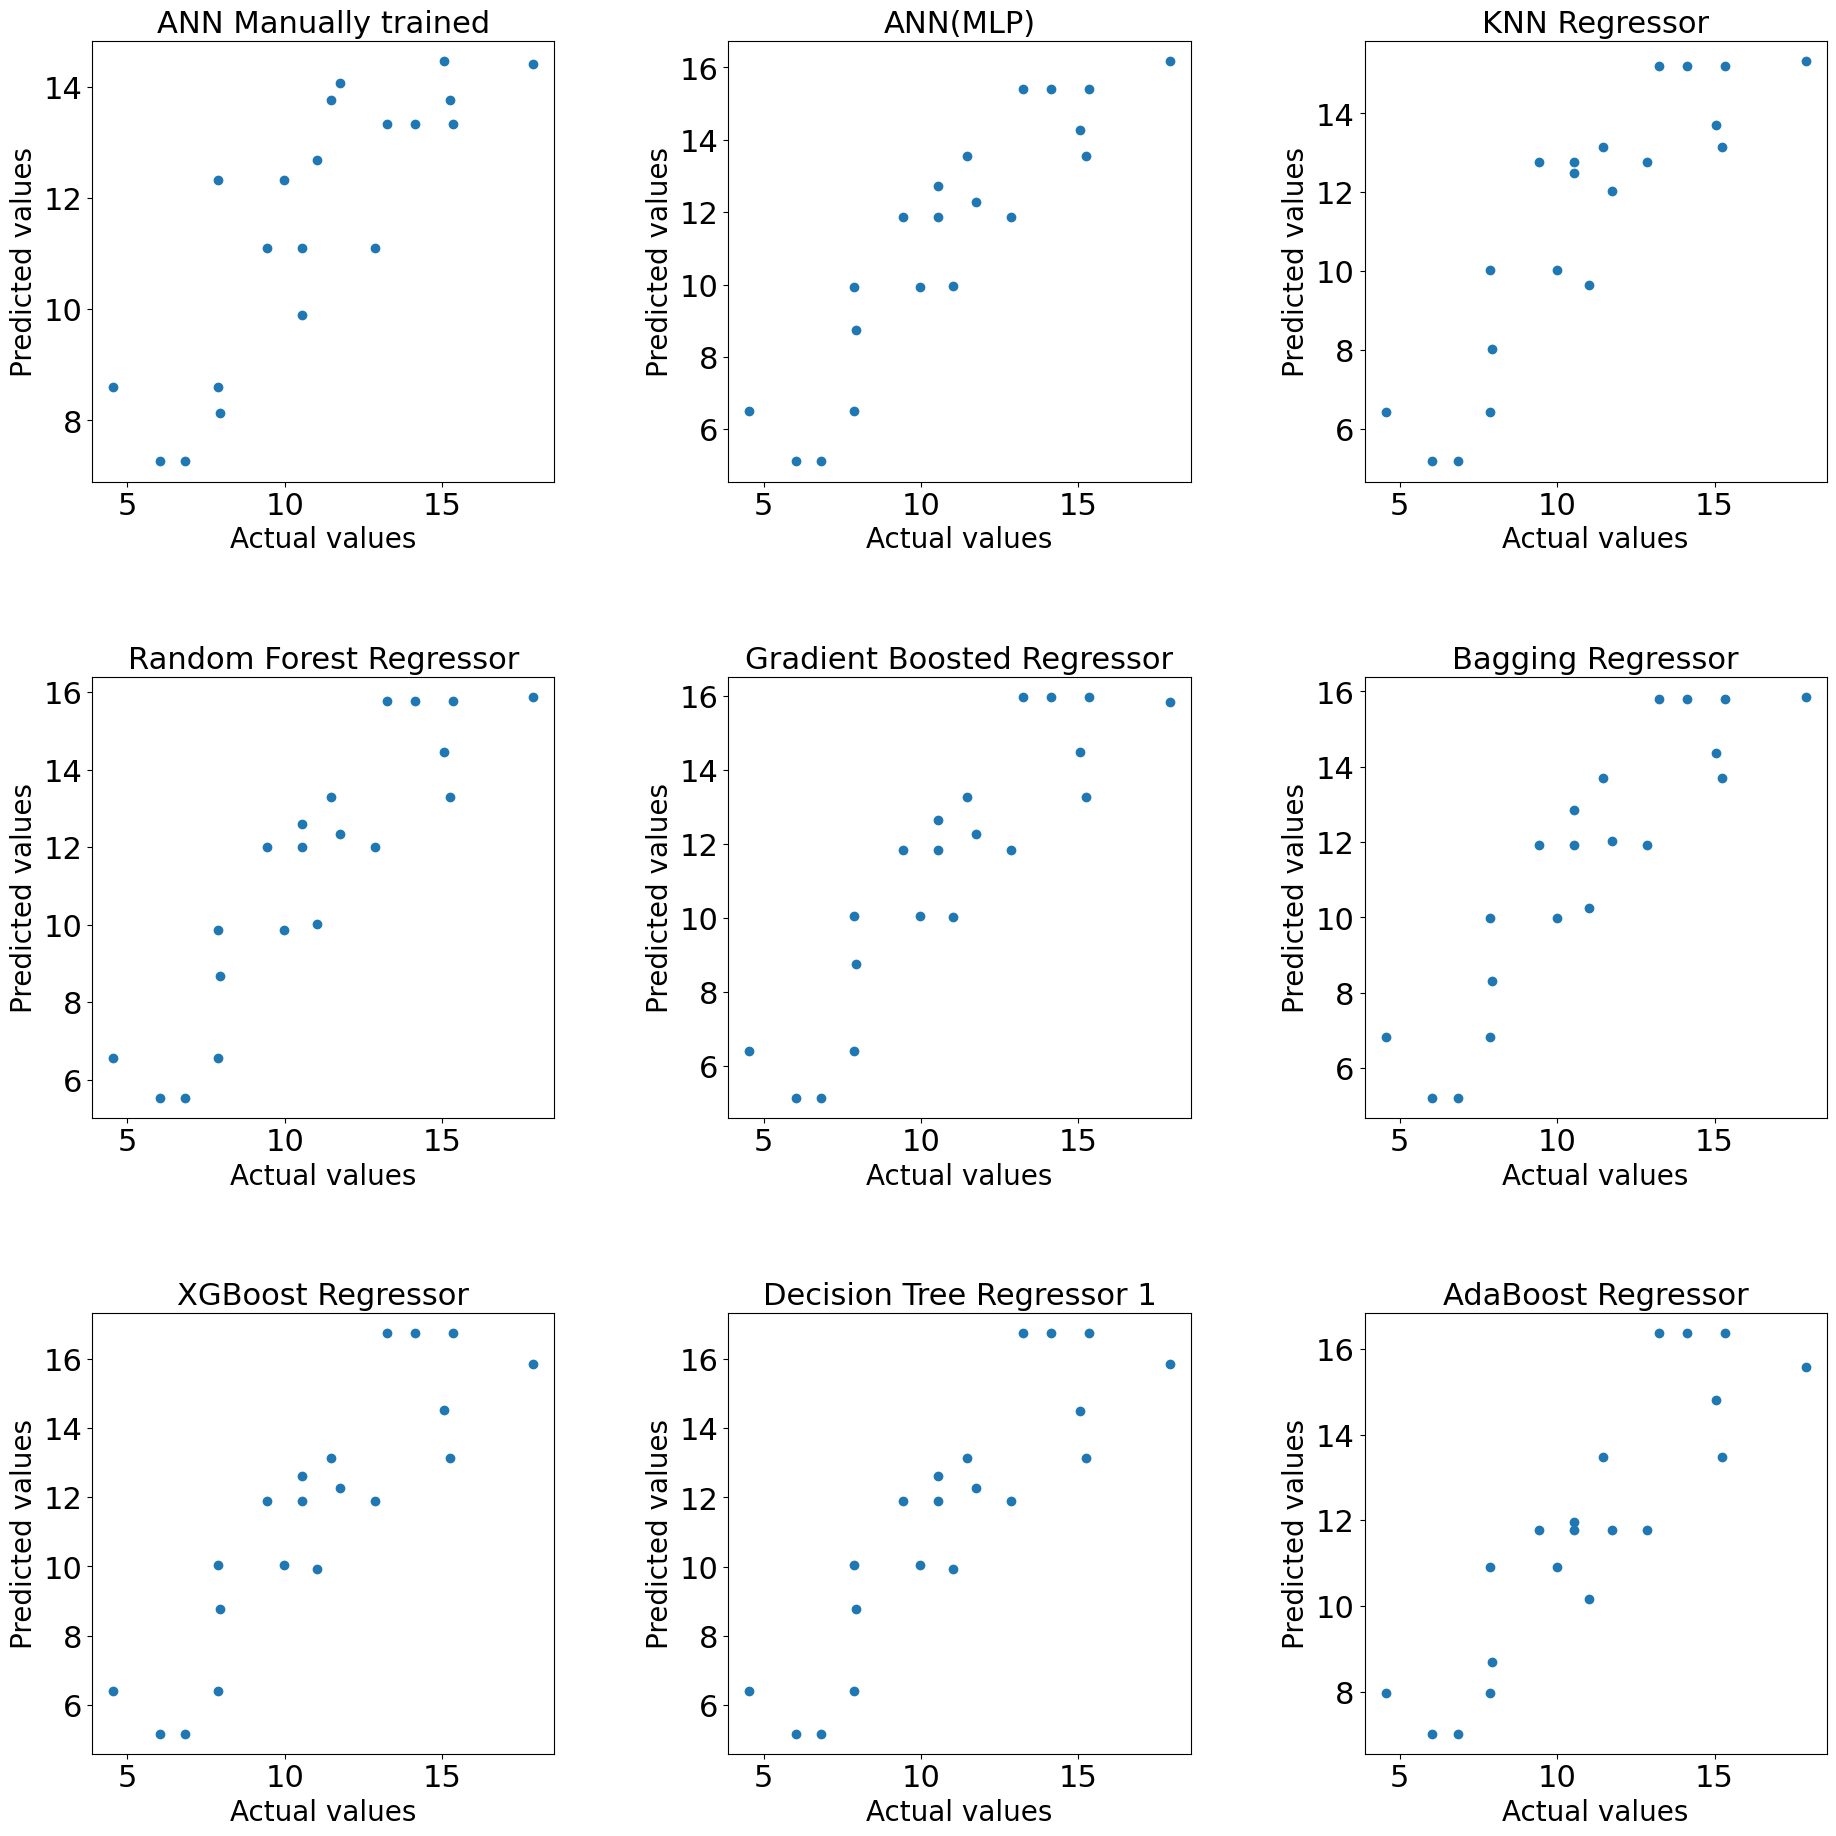

In [281]:
plt.clf()
fig,ax=plt.subplots(3,3,figsize=(20,20))

#Manual ANN
ax[0,0].scatter(y_test,y_pred_ANN_manual)
ax[0,0].set_title("ANN Manually trained")
ax[0,0].set_xlabel("Actual values")
ax[0,0].set_ylabel("Predicted values")

#MLP Sklearn
ax[0,1].scatter(y_test,y_pred_MLP)
ax[0,1].set_title("ANN(MLP)")
ax[0,1].set_xlabel("Actual values")
ax[0,1].set_ylabel("Predicted values")

model3=KNeighborsRegressor(n_neighbors=2)
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
ax[0,2].scatter(y_test,y_pred)
ax[0,2].set_title("KNN Regressor")
ax[0,2].set_xlabel("Actual values")
ax[0,2].set_ylabel("Predicted values")

model4=RandomForestRegressor()
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)
ax[1,0].scatter(y_test,y_pred)
ax[1,0].set_title("Random Forest Regressor")
ax[1,0].set_xlabel("Actual values")
ax[1,0].set_ylabel("Predicted values")

model5=GradientBoostingRegressor()
model5.fit(X_train,y_train)
y_pred=model5.predict(X_test)
ax[1,1].scatter(y_test,y_pred)
ax[1,1].set_title("Gradient Boosted Regressor")
ax[1,1].set_xlabel("Actual values")
ax[1,1].set_ylabel("Predicted values")

model6=BaggingRegressor()
model6.fit(X_train,y_train)
y_pred=model6.predict(X_test)
ax[1,2].scatter(y_test,y_pred)
ax[1,2].set_title("Bagging Regressor")
ax[1,2].set_xlabel("Actual values")
ax[1,2].set_ylabel("Predicted values")

model7=XGBRegressor()
model7.fit(X_train,y_train)
y_pred=model7.predict(X_test)
ax[2,0].scatter(y_test,y_pred)
ax[2,0].set_title("XGBoost Regressor")
ax[2,0].set_xlabel("Actual values")
ax[2,0].set_ylabel("Predicted values")

model8=DecisionTreeRegressor()
model8.fit(X_train,y_train)
y_pred=model8.predict(X_test)
ax[2,1].scatter(y_test,y_pred)
ax[2,1].set_title("Decision Tree Regressor 1")
ax[2,1].set_xlabel("Actual values")
ax[2,1].set_ylabel("Predicted values")

model9=AdaBoostRegressor()
model9.fit(X_train,y_train)
y_pred=model9.predict(X_test)
ax[2,2].scatter(y_test,y_pred)
ax[2,2].set_title("AdaBoost Regressor")
ax[2,2].set_xlabel("Actual values")
ax[2,2].set_ylabel("Predicted values")

fig.tight_layout(pad=3)

## Plot type 2 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

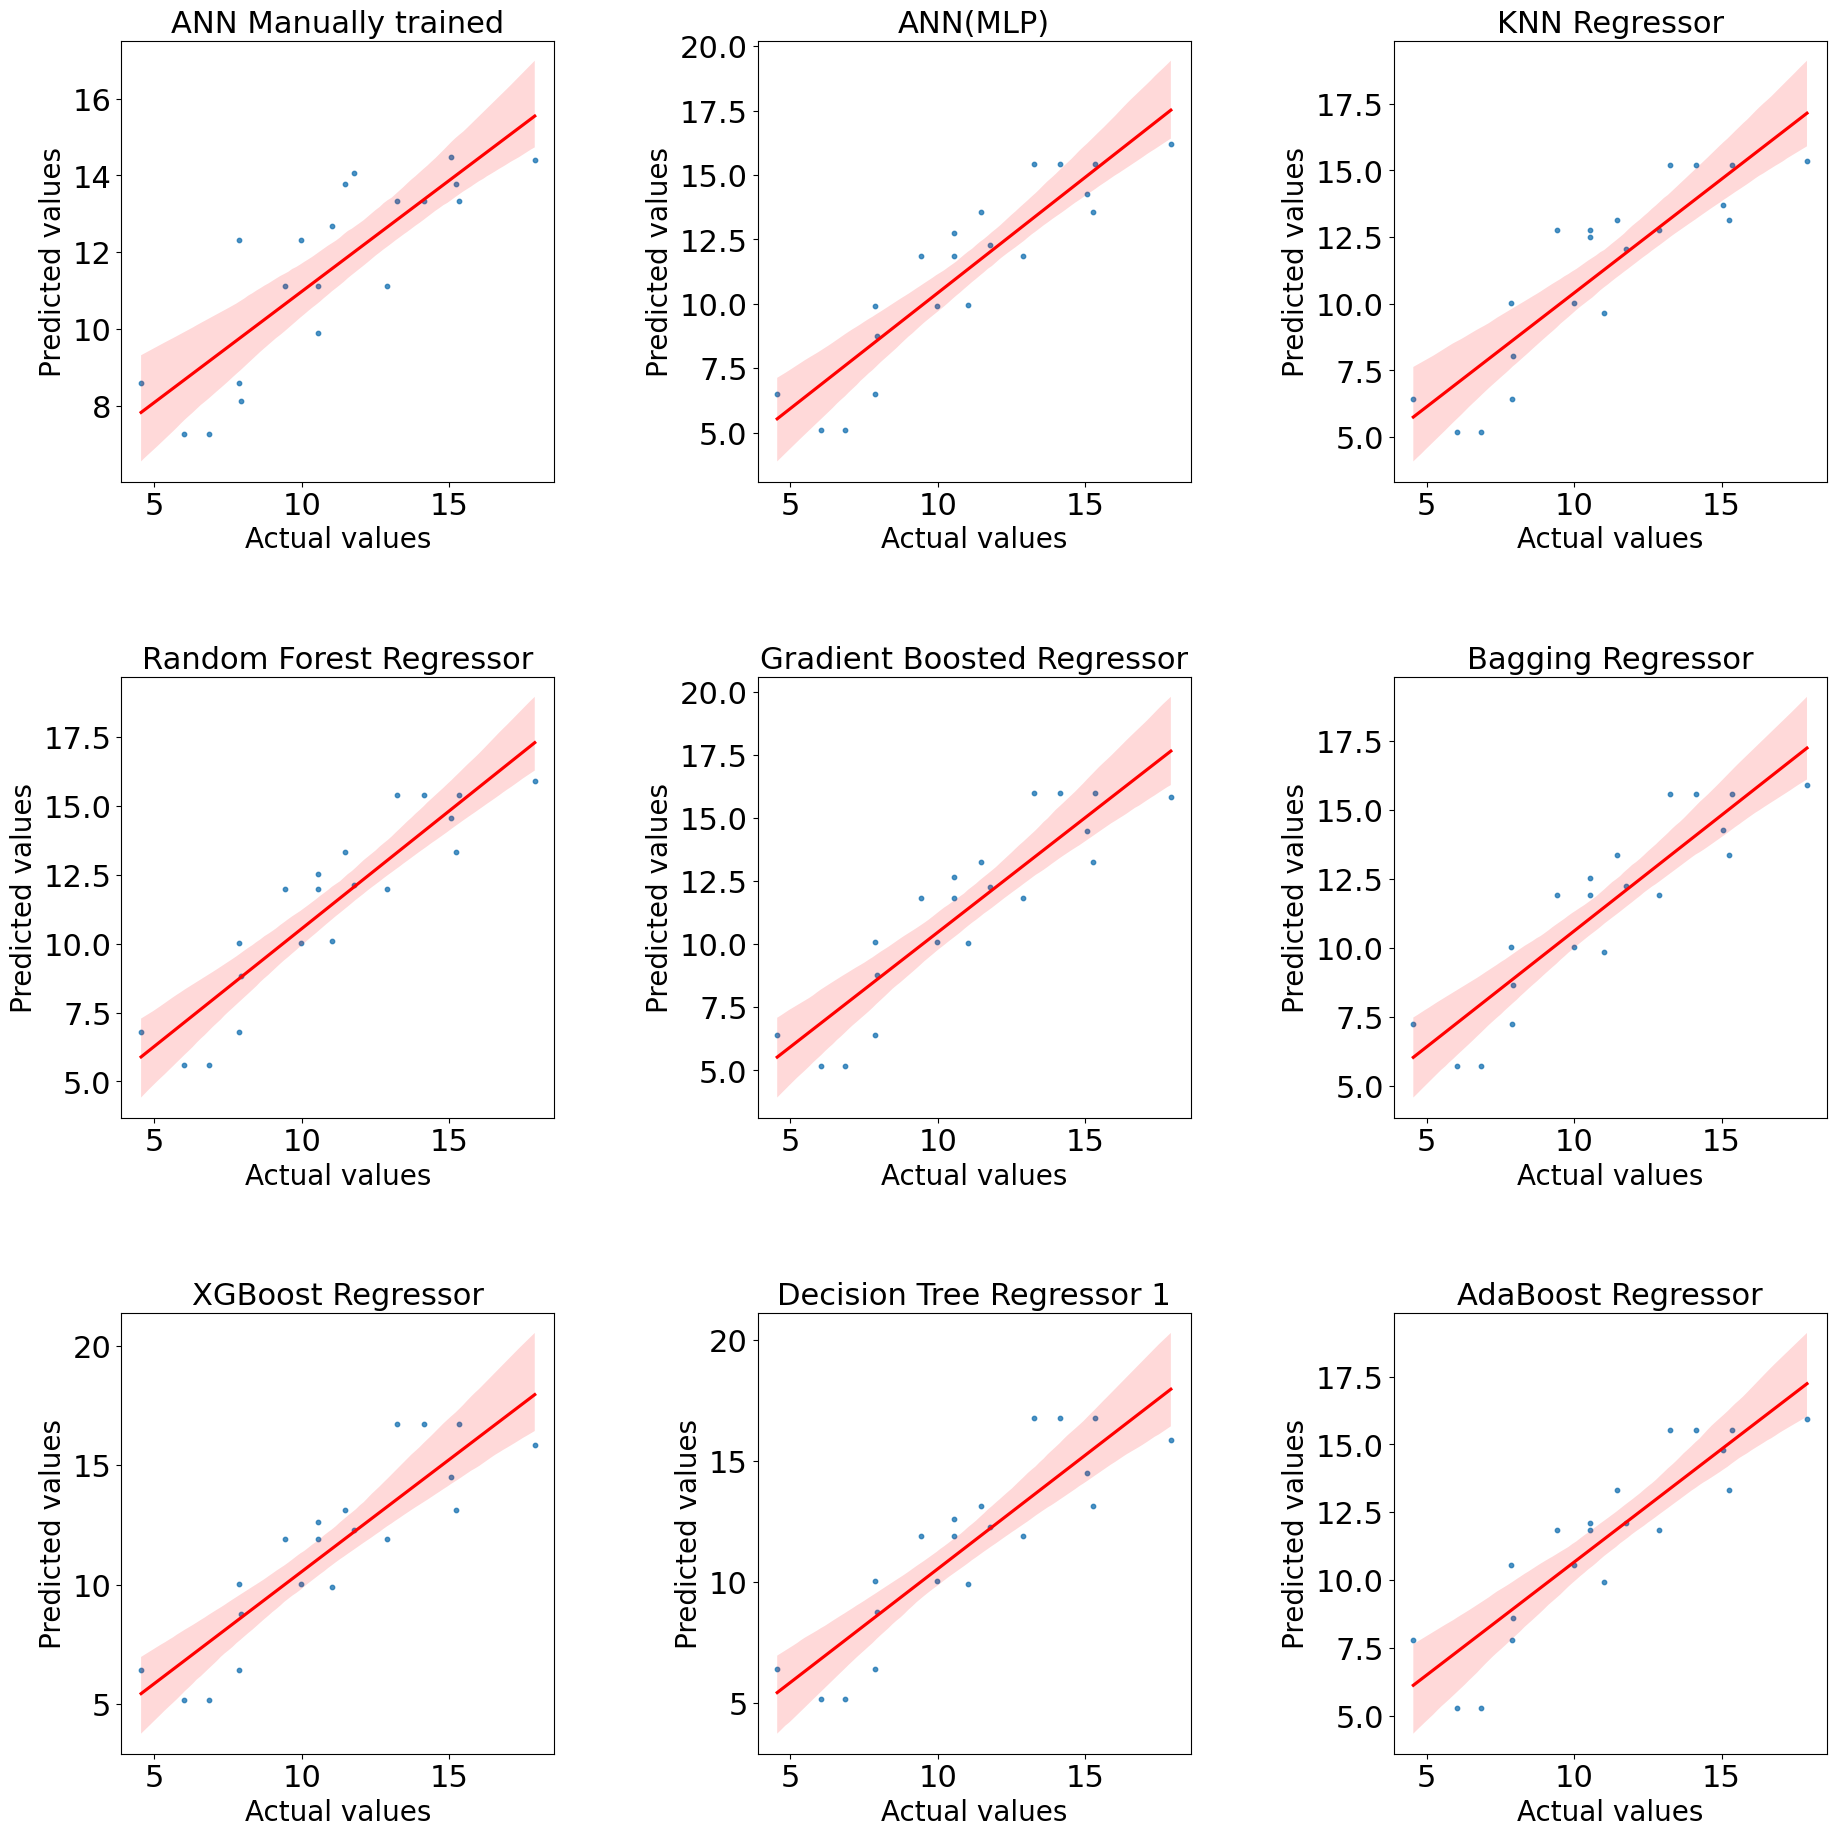

In [282]:
plt.clf()
fig,ax=plt.subplots(3,3,figsize=(20,20))

#Manual ANN
sns.regplot(x=y_test, y=y_pred_ANN_manual, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[0,0])
ax[0,0].set_title("ANN Manually trained")
ax[0,0].set_xlabel("Actual values")
ax[0,0].set_ylabel("Predicted values")

#MLP Sklearn
sns.regplot(x=y_test, y=y_pred_MLP, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[0,1])
ax[0,1].set_title("ANN(MLP)")
ax[0,1].set_xlabel("Actual values")
ax[0,1].set_ylabel("Predicted values")

model3=KNeighborsRegressor(n_neighbors=2)
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[0,2])
ax[0,2].set_title("KNN Regressor")
ax[0,2].set_xlabel("Actual values")
ax[0,2].set_ylabel("Predicted values")

model4=RandomForestRegressor()
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[1,0])
ax[1,0].set_title("Random Forest Regressor")
ax[1,0].set_xlabel("Actual values")
ax[1,0].set_ylabel("Predicted values")

model5=GradientBoostingRegressor()
model5.fit(X_train,y_train)
y_pred=model5.predict(X_test)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[1,1])
ax[1,1].set_title("Gradient Boosted Regressor")
ax[1,1].set_xlabel("Actual values")
ax[1,1].set_ylabel("Predicted values")

model6=BaggingRegressor()
model6.fit(X_train,y_train)
y_pred=model6.predict(X_test)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[1,2])
ax[1,2].set_title("Bagging Regressor")
ax[1,2].set_xlabel("Actual values")
ax[1,2].set_ylabel("Predicted values")

model7=XGBRegressor()
model7.fit(X_train,y_train)
y_pred=model7.predict(X_test)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[2,0])
ax[2,0].set_title("XGBoost Regressor")
ax[2,0].set_xlabel("Actual values")
ax[2,0].set_ylabel("Predicted values")

model8=DecisionTreeRegressor()
model8.fit(X_train,y_train)
y_pred=model8.predict(X_test)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[2,1])
ax[2,1].set_title("Decision Tree Regressor 1")
ax[2,1].set_xlabel("Actual values")
ax[2,1].set_ylabel("Predicted values")

model9=AdaBoostRegressor()
model9.fit(X_train,y_train)
y_pred=model9.predict(X_test)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[2,2])
ax[2,2].set_title("AdaBoost Regressor")
ax[2,2].set_xlabel("Actual values")
ax[2,2].set_ylabel("Predicted values")

fig.tight_layout(pad=3)

## Type 3 Plots 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

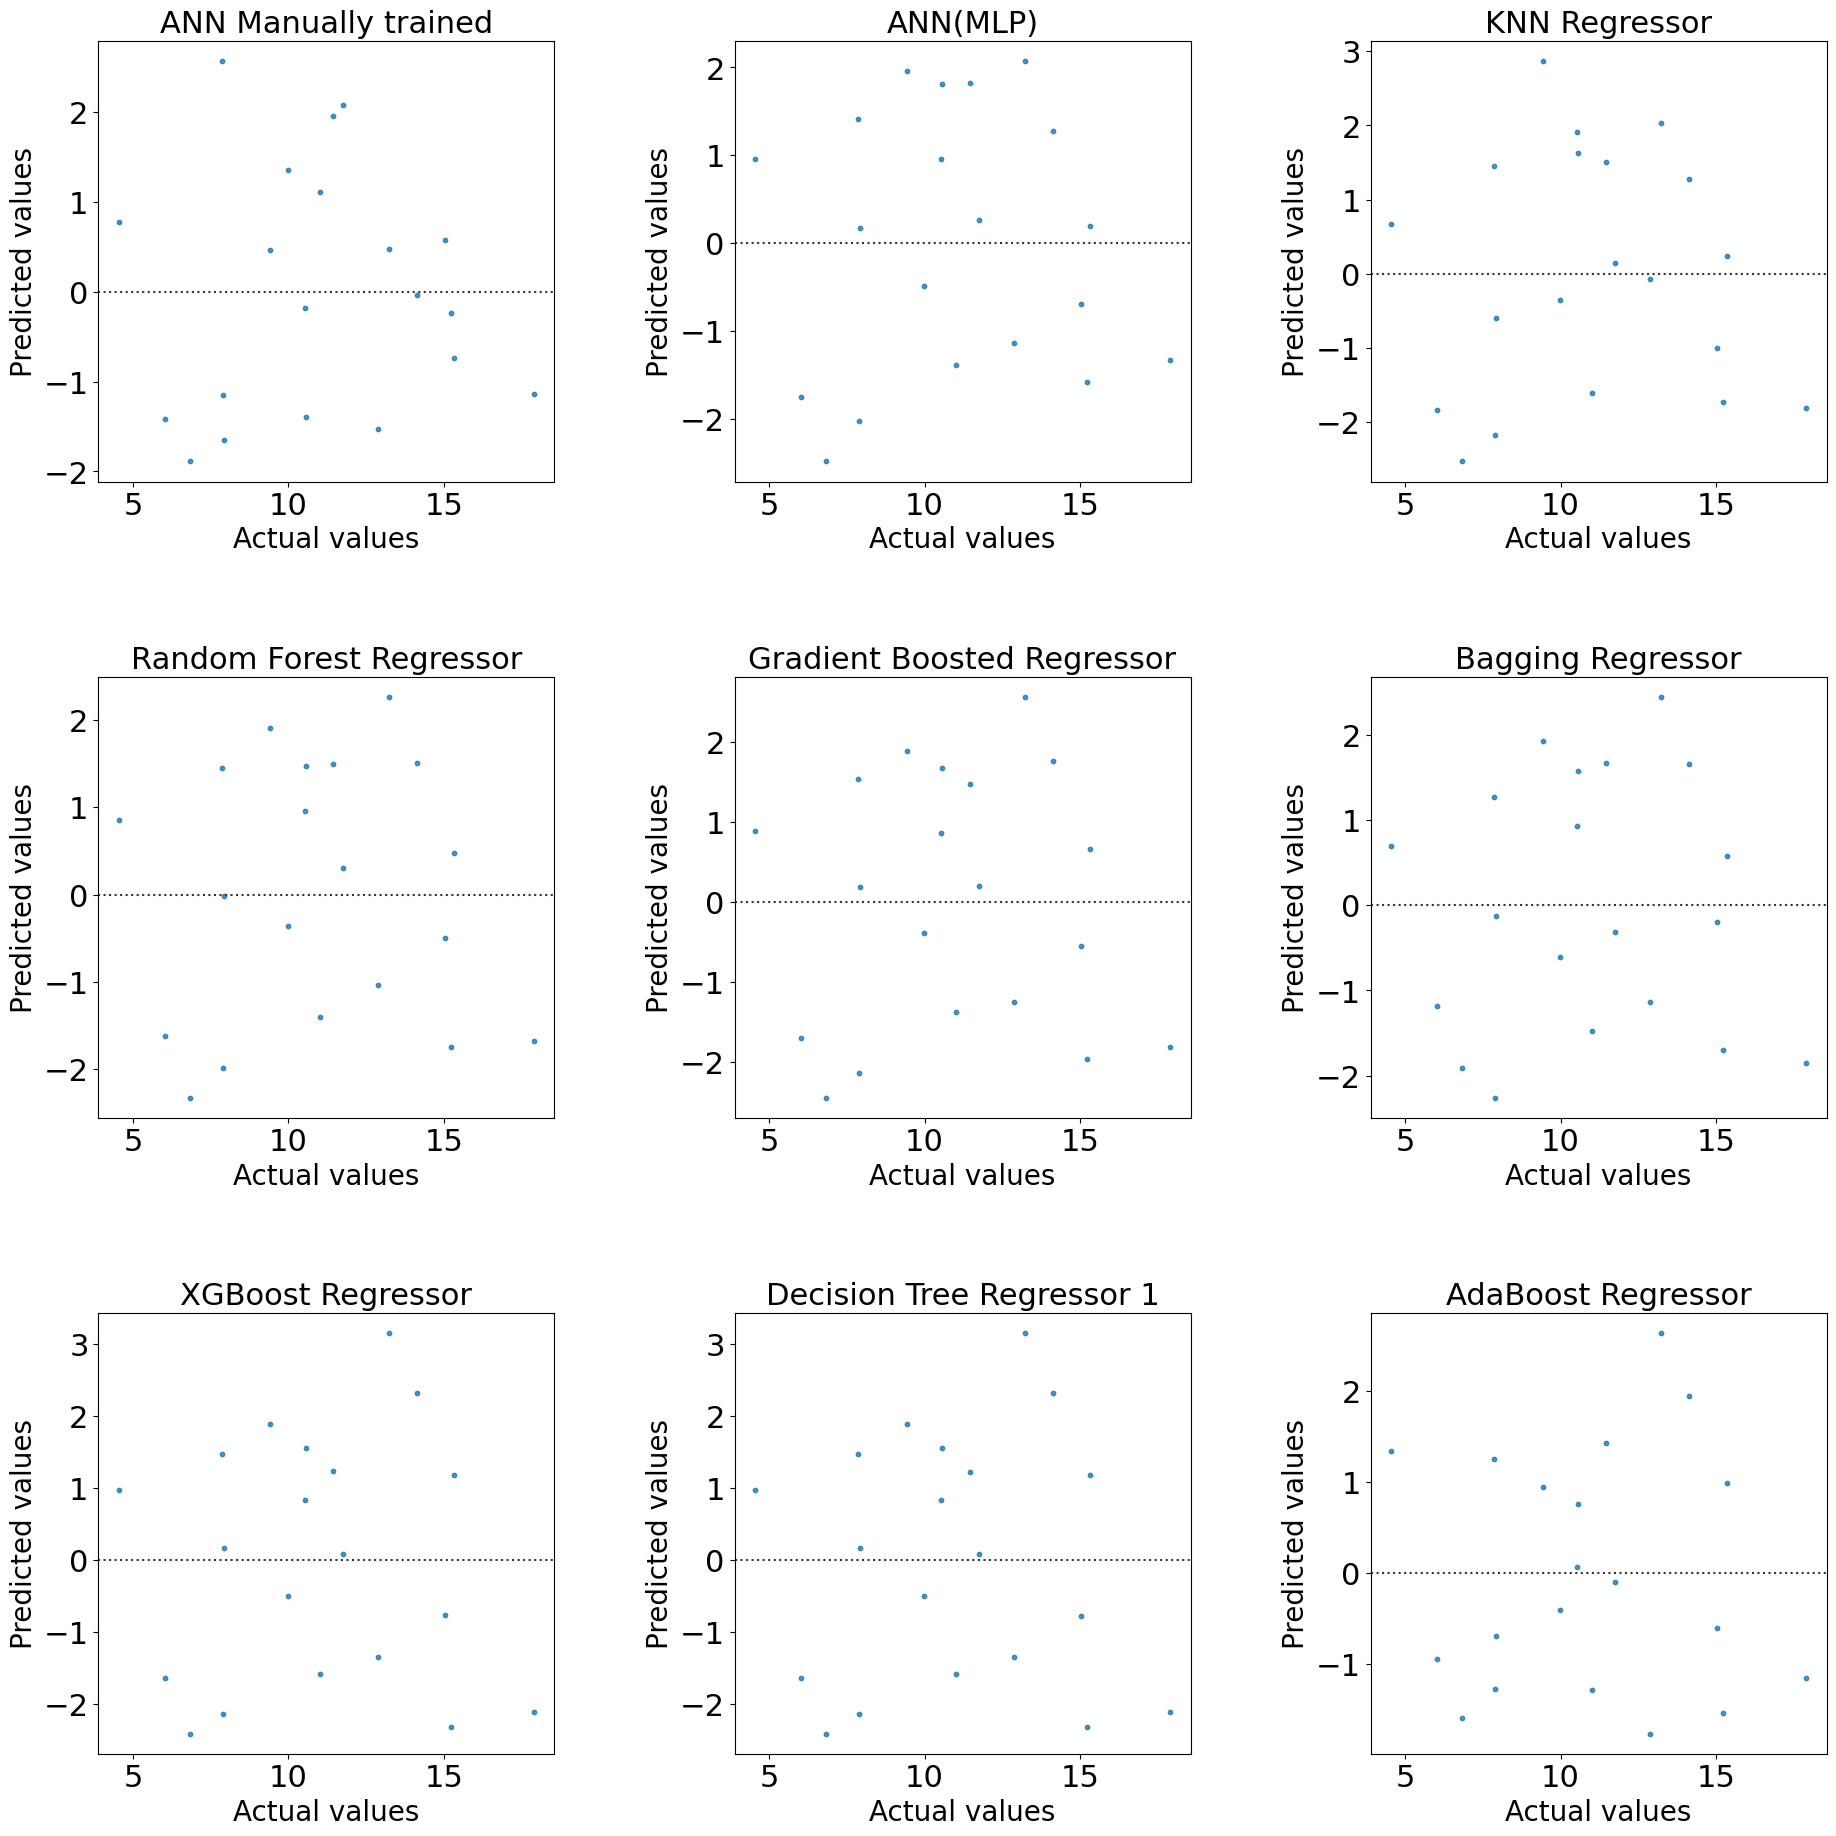

In [283]:
plt.clf()
fig,ax=plt.subplots(3,3,figsize=(20,20))

#Manual ANN
sns.residplot(x=y_test, y=y_pred_ANN_manual, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[0,0])
ax[0,0].set_title("ANN Manually trained")
ax[0,0].set_xlabel("Actual values")
ax[0,0].set_ylabel("Predicted values")

#MLP Sklearn
sns.residplot(x=y_test, y=y_pred_MLP, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[0,1])
ax[0,1].set_title("ANN(MLP)")
ax[0,1].set_xlabel("Actual values")
ax[0,1].set_ylabel("Predicted values")

model3=KNeighborsRegressor(n_neighbors=2)
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
sns.residplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[0,2])
ax[0,2].set_title("KNN Regressor")
ax[0,2].set_xlabel("Actual values")
ax[0,2].set_ylabel("Predicted values")

model4=RandomForestRegressor()
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)
sns.residplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[1,0])
ax[1,0].set_title("Random Forest Regressor")
ax[1,0].set_xlabel("Actual values")
ax[1,0].set_ylabel("Predicted values")

model5=GradientBoostingRegressor()
model5.fit(X_train,y_train)
y_pred=model5.predict(X_test)
sns.residplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[1,1])
ax[1,1].set_title("Gradient Boosted Regressor")
ax[1,1].set_xlabel("Actual values")
ax[1,1].set_ylabel("Predicted values")

model6=BaggingRegressor()
model6.fit(X_train,y_train)
y_pred=model6.predict(X_test)
sns.residplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[1,2])
ax[1,2].set_title("Bagging Regressor")
ax[1,2].set_xlabel("Actual values")
ax[1,2].set_ylabel("Predicted values")

model7=XGBRegressor()
model7.fit(X_train,y_train)
y_pred=model7.predict(X_test)
sns.residplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[2,0])
ax[2,0].set_title("XGBoost Regressor")
ax[2,0].set_xlabel("Actual values")
ax[2,0].set_ylabel("Predicted values")

model8=DecisionTreeRegressor()
model8.fit(X_train,y_train)
y_pred=model8.predict(X_test)
sns.residplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[2,1])
ax[2,1].set_title("Decision Tree Regressor 1")
ax[2,1].set_xlabel("Actual values")
ax[2,1].set_ylabel("Predicted values")

model9=AdaBoostRegressor()
model9.fit(X_train,y_train)
y_pred=model9.predict(X_test)
sns.residplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[2,2])
ax[2,2].set_title("AdaBoost Regressor")
ax[2,2].set_xlabel("Actual values")
ax[2,2].set_ylabel("Predicted values")

fig.tight_layout(pad=3)

## Type 4 plot 

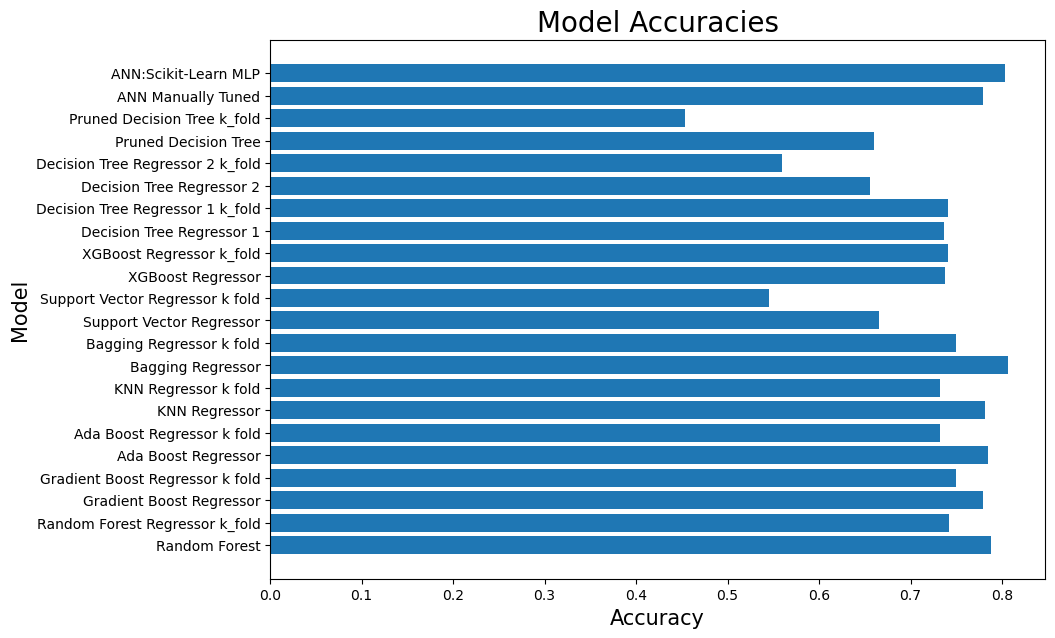

In [284]:
plt.rcdefaults()
models=list(results["Algorithm"][:-1])
scores=list(results["accuracy"][:-1])
plt.figure(figsize=(10,7))
plt.barh(models[:],scores[:])
plt.ylabel("Model",fontsize=15)
plt.xlabel("Accuracy",fontsize=15)
plt.title("Model Accuracies",fontsize=20)
plt.xticklabels=results["Algorithm"]

## Type 5 Plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

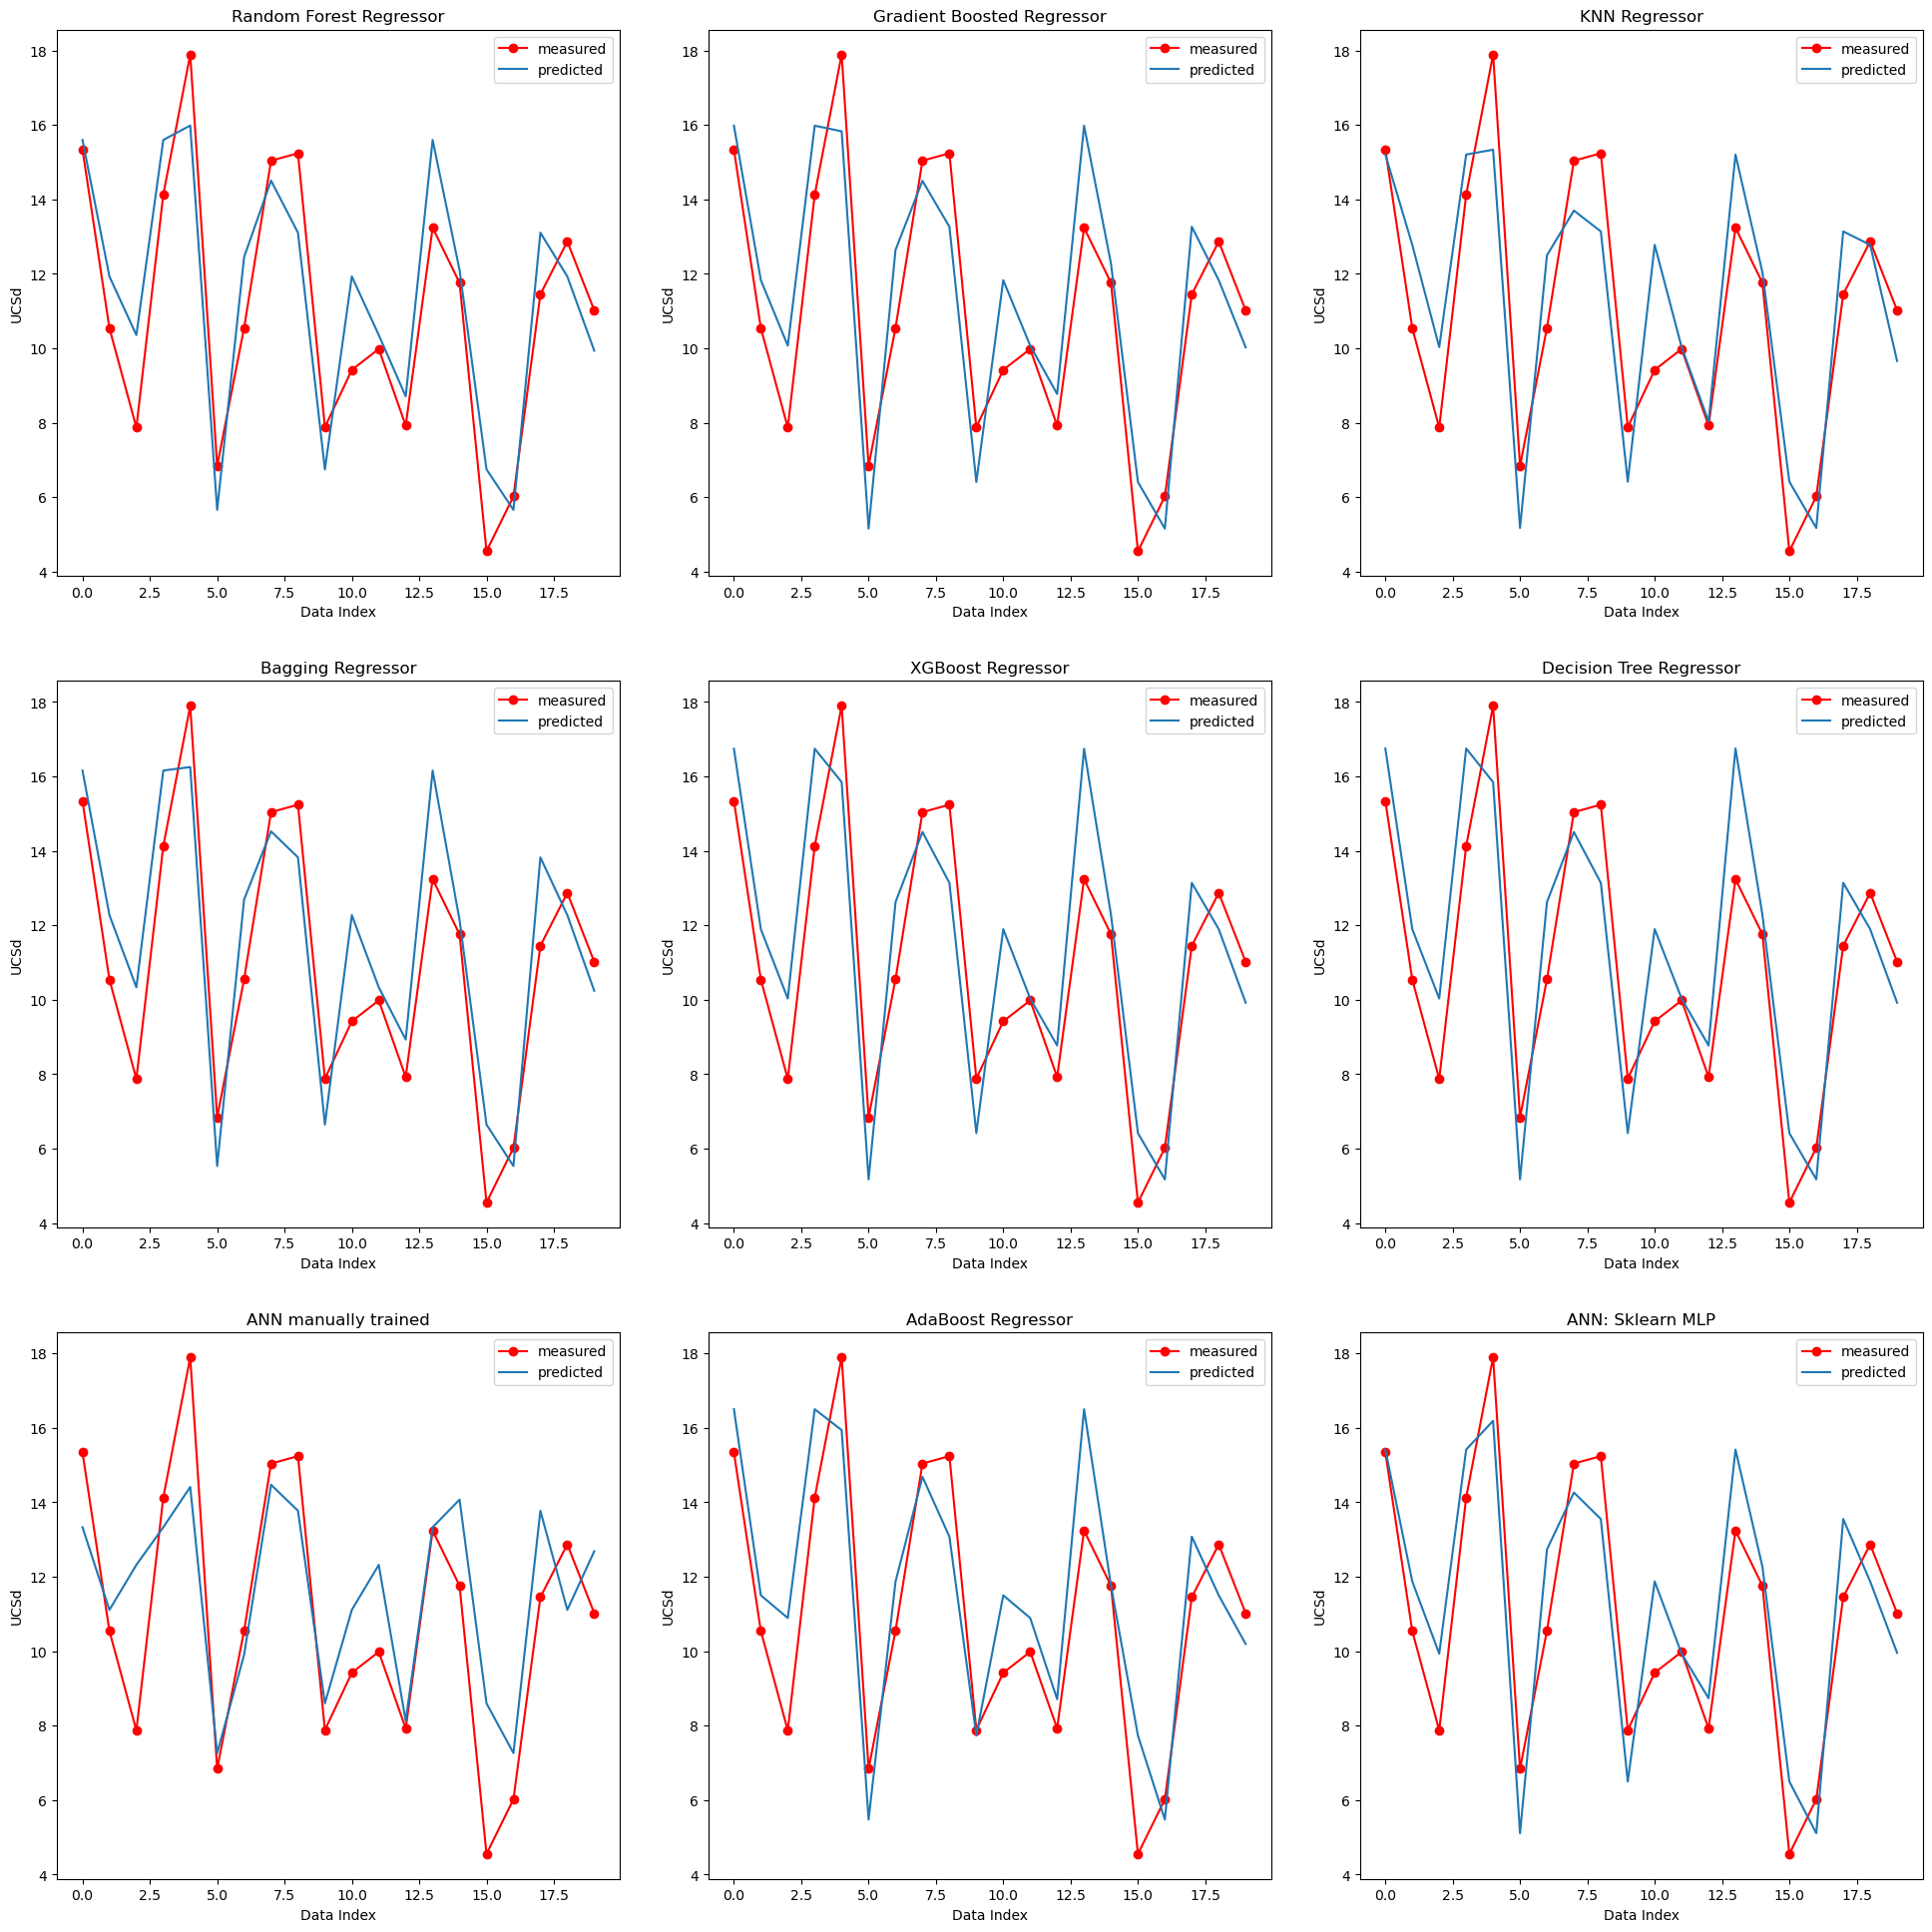

In [285]:
arr=np.arange(20)

plt.clf()
import seaborn as sns
fig,ax=plt.subplots(3,3,figsize=(20,20))

model1=RandomForestRegressor()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
ax[0,0].set_title("Random Forest Regressor")
ax[0,0].plot(arr,y_test,"r-o",label="measured")
ax[0,0].plot(arr,y_pred,label="predicted")
ax[0,0].legend()
ax[0,0].set_xlabel("Data Index")
ax[0,0].set_ylabel("UCSd")

model2=GradientBoostingRegressor()
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
ax[0,1].set_title("Gradient Boosted Regressor")
ax[0,1].plot(arr,y_test,"r-o",label="measured")
ax[0,1].plot(arr,y_pred,label="predicted")
ax[0,1].legend()
ax[0,1].set_xlabel("Data Index")
ax[0,1].set_ylabel("UCSd")

model3=KNeighborsRegressor(n_neighbors=2)
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
ax[0,2].set_title("KNN Regressor")
ax[0,2].plot(arr,y_test,"r-o",label="measured")
ax[0,2].plot(arr,y_pred,label="predicted")
ax[0,2].legend()
ax[0,2].set_xlabel("Data Index")
ax[0,2].set_ylabel("UCSd")

model4=BaggingRegressor()
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)
ax[1,0].set_title("Bagging Regressor")
ax[1,0].plot(arr,y_test,"r-o",label="measured")
ax[1,0].plot(arr,y_pred,label="predicted")
ax[1,0].legend()
ax[1,0].set_xlabel("Data Index")
ax[1,0].set_ylabel("UCSd")

model5=XGBRegressor()
model5.fit(X_train,y_train)
y_pred=model5.predict(X_test)
ax[1,1].set_title("XGBoost Regressor")
ax[1,1].plot(arr,y_test,"r-o",label="measured")
ax[1,1].plot(arr,y_pred,label="predicted")
ax[1,1].legend()
ax[1,1].set_xlabel("Data Index")
ax[1,1].set_ylabel("UCSd")

model6=DecisionTreeRegressor()
model6.fit(X_train,y_train)
y_pred=model6.predict(X_test)
ax[1,2].set_title("Decision Tree Regressor")
ax[1,2].plot(arr,y_test,"r-o",label="measured")
ax[1,2].plot(arr,y_pred,label="predicted")
ax[1,2].legend()
ax[1,2].set_xlabel("Data Index")
ax[1,2].set_ylabel("UCSd")

#manual ANN
ax[2,0].set_title("ANN manually trained")
ax[2,0].plot(arr,y_test,"r-o",label="measured")
ax[2,0].plot(arr,y_pred_ANN_manual,label="predicted")
ax[2,0].legend()
ax[2,0].set_xlabel("Data Index")
ax[2,0].set_ylabel("UCSd")

model8=AdaBoostRegressor()
model8.fit(X_train,y_train)
y_pred=model8.predict(X_test)
ax[2,1].set_title("AdaBoost Regressor")
ax[2,1].plot(arr,y_test,"r-o",label="measured")
ax[2,1].plot(arr,y_pred,label="predicted")
ax[2,1].legend()
ax[2,1].set_xlabel("Data Index")
ax[2,1].set_ylabel("UCSd")

#MLP Sklearn
ax[2,2].set_title("ANN: Sklearn MLP")
ax[2,2].plot(arr,y_test,"r-o",label="measured")
ax[2,2].plot(arr,y_pred_MLP,label="predicted")
ax[2,2].legend()
ax[2,2].set_xlabel("Data Index")
ax[2,2].set_ylabel("UCSd")

fig.tight_layout(pad=3)